## Final Project Submission

Please fill out:
* Student name: Allie Kelly
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


 ## First Step: Import all necessary packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
print(df.describe())
print(df.info())
df.head()

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.price.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


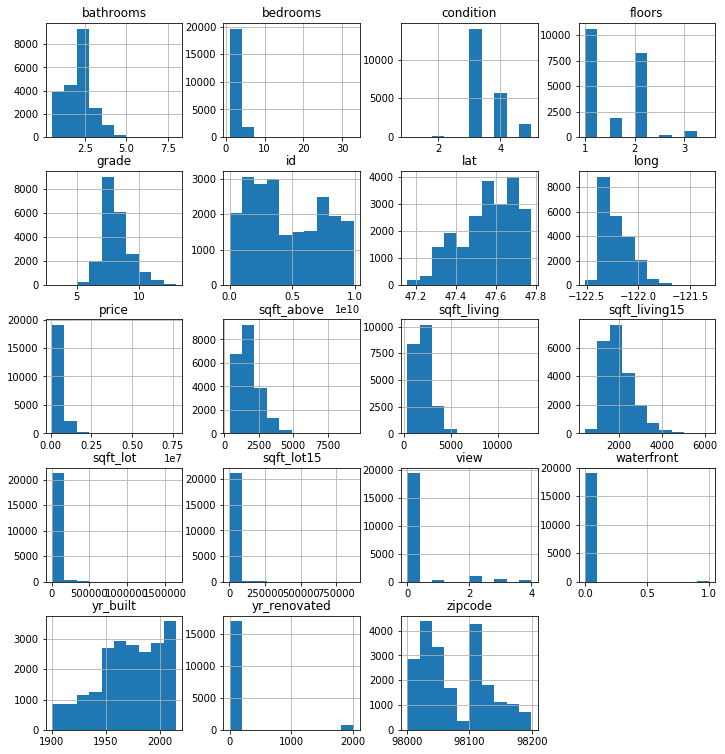

In [5]:
df.hist(figsize=(12,13)); #Get histograms to explore distributions of variables

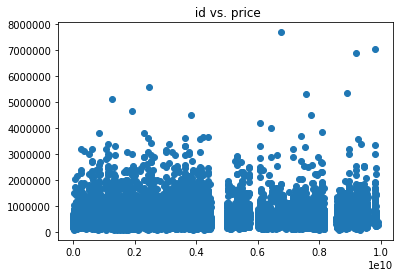

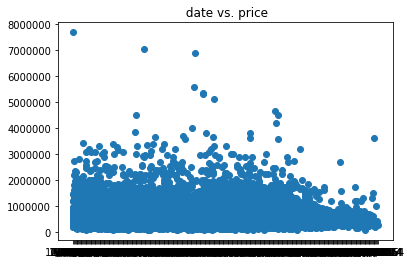

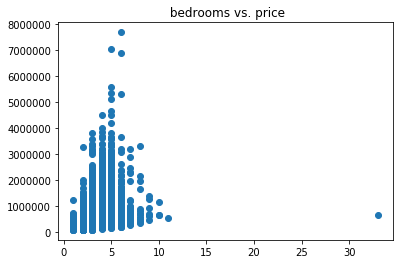

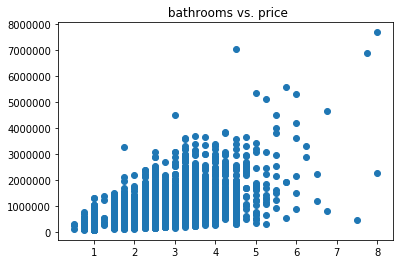

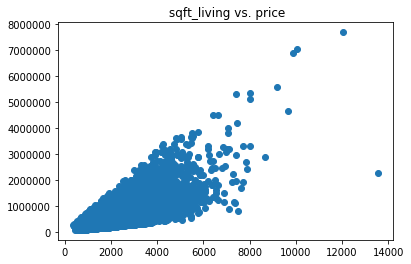

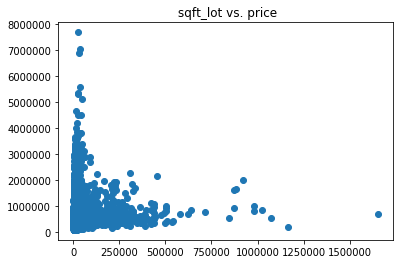

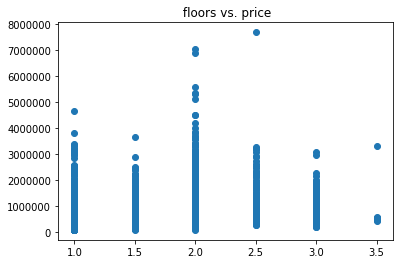

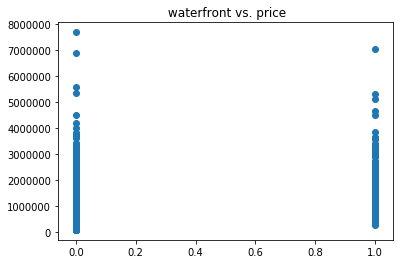

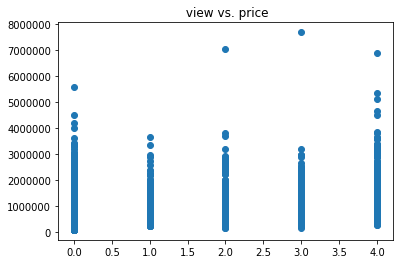

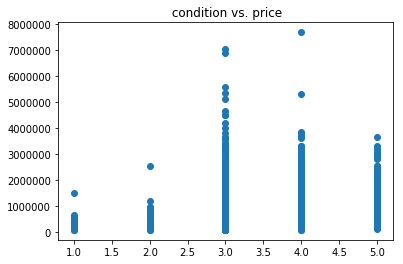

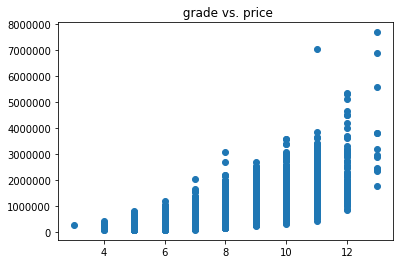

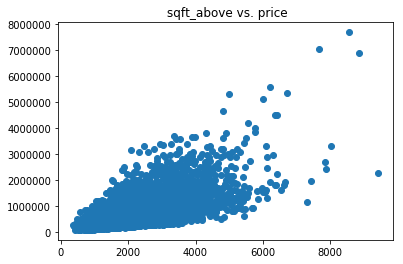

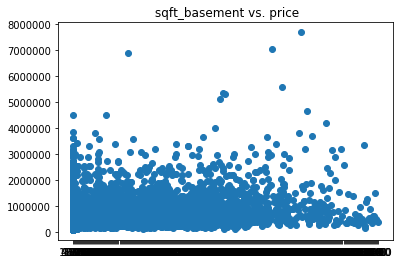

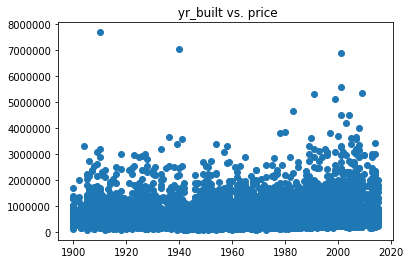

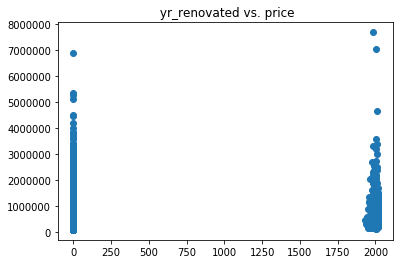

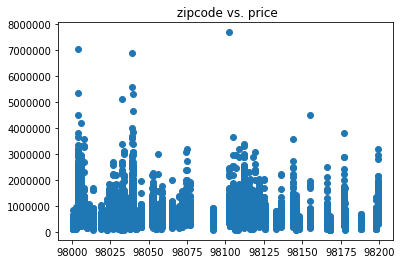

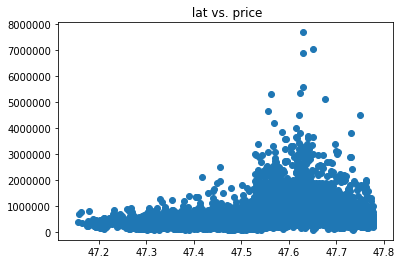

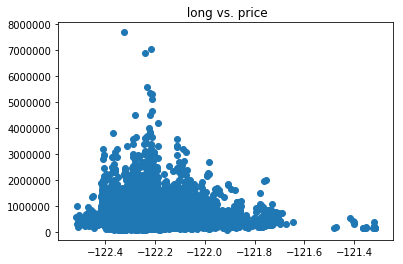

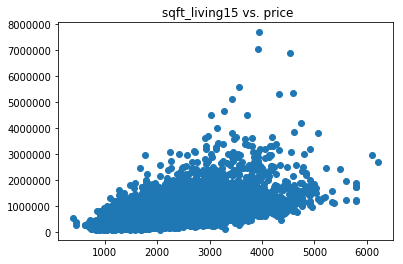

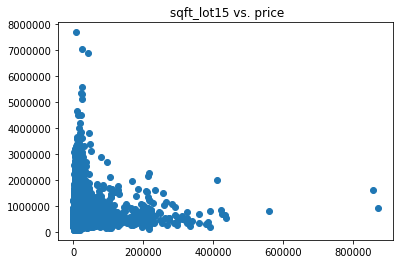

In [6]:
x_cols = df.drop('price', axis=1)
for col in x_cols.columns:
    plt.scatter(df[col], df['price'])
    plt.title(f' {col} vs. price')
    plt.show();

## Preliminary Investigation
### Data Types

A few things stuck out to me first, namely that the bedroom max value is 33, which is almost an unbelieveable number and may have been intended to be just 3. When I clean the data, I may substitute for the mean/mode value to mitigate any disruption due to such an extreme outlier. 

I also noticed that the basement square-footage values are strings instead of floats, which will need to be changed. 

Year renovated, View, and Waterfront all have null values in them which will need to be investigated. 

Also, the zipcode series is an integer, but should be a string as zipcodes are immutable and should not be dealt with as a number, barring any rezoning which isn't a concern for this process. Changing the datatype may not be necessary for this project though. 

All categorical series are integers/floats, which will need to be changed to strings and one-hot encoded.

### Histograms

You can see most of the variables are categorical variables such as waterfront, view, year renovated, floors, condition, bathrooms and bedrooms. Grade looks continuous, though it's an integer so it's unlikely. Variables that indicate square footage seem to follow a normalized pattern. 

## Second Step: Scrub the Data

### Dealing with NaNs

In [7]:
features = df.drop("price", axis=1) #defining features  
target = df.loc[:,'price'] #defining target
target = pd.DataFrame(target)

In [8]:
features.sqft_basement = features.sqft_basement.replace('?', '0.0') #Replacing ? with the most common value

In [9]:
features.waterfront.fillna(0.0, inplace=True) #Less than 1% of the properties were on the water, so I replaced the NaNs with 0.0.

In [10]:
features.yr_renovated.value_counts(dropna=False) #It looks as if 0 indicates that it's never been renovated.

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

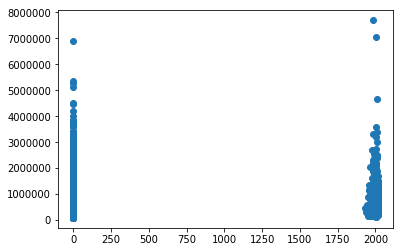

In [11]:
plt.scatter(features.yr_renovated, target)

In [12]:
yes_ren = df.loc[df.yr_renovated > 0.0]

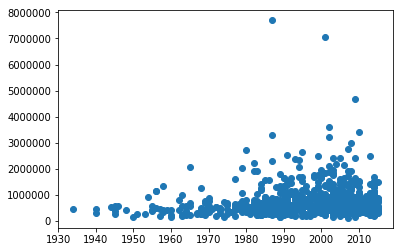

In [13]:
plt.scatter(yes_ren.yr_renovated, yes_ren.price) 

In [14]:
features = features.drop("yr_renovated", axis=1)

It looks like there is a general trend towards higher priced homes having been more recently renovated, the vast majority of all the homes that have been renovated are still 200000 or less, so I'm going to drop this column. 

In [15]:
features.view.value_counts(dropna=False) 

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [16]:
features.view.fillna(0.0, inplace=True)

### Multicollinearity Check

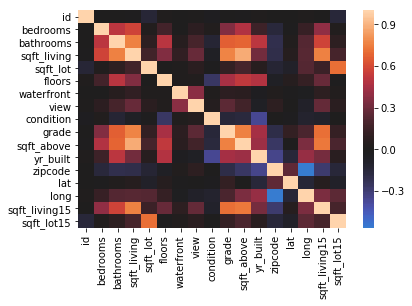

In [17]:
sns.heatmap(features.corr(), center=0);

In [18]:
features = df.drop(['price','id'], axis=1) #Dropping target variable and unusable ID column

In [19]:
abs(features.corr()) > 0.75 #Finding correlations higher than 75%

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [20]:
features = features.drop(['sqft_above','sqft_living15'], axis=1) #Too highly correlated with sqft_living

In [21]:
abs(features.corr()) > 0.75 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


### Normalize Non-Categorical Features


In [22]:
features.sqft_basement = features.sqft_basement.replace('?', '0.0') #For some reason this doesn't stick and needs to be input again
features.sqft_basement = features.sqft_basement.astype('float')

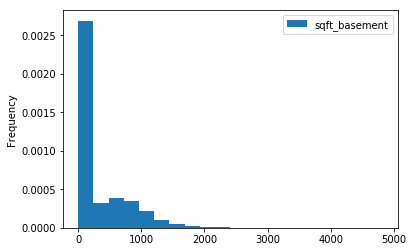

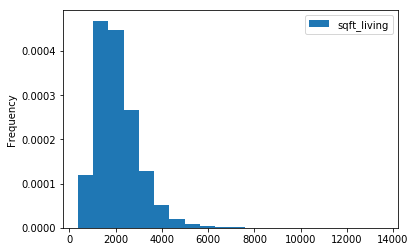

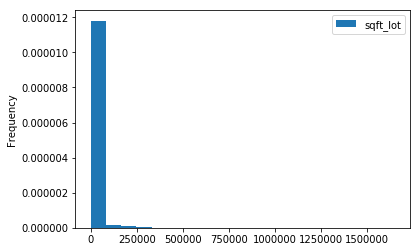

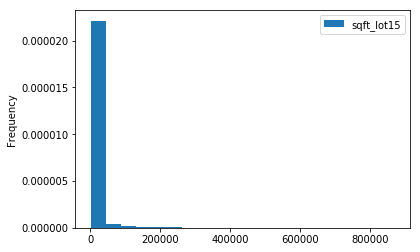

In [23]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    features[column].plot.hist(bins = 20, density=True)
    plt.legend()
    plt.show()

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


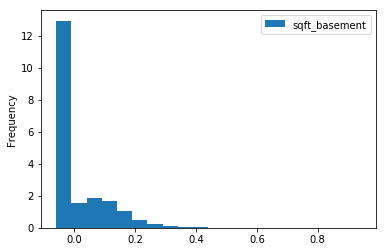

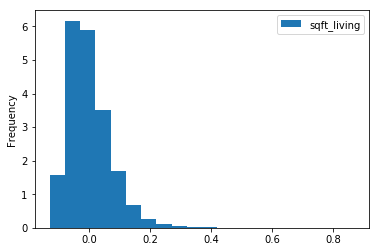

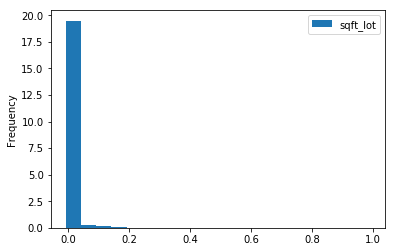

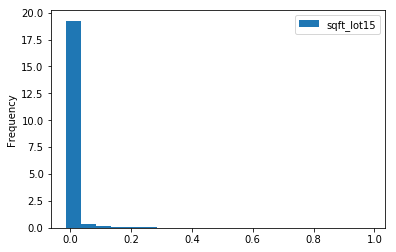

In [24]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    np.log(features[column]) #log transform each continuous variable


features.sqft_living = (features.sqft_living-np.mean(features.sqft_living))/(max(features.sqft_living)-min(features.sqft_living))
features.sqft_lot = (features.sqft_lot-np.mean(features.sqft_lot))/(max(features.sqft_lot)-min(features.sqft_lot))
features.sqft_lot15 = (features.sqft_lot15-np.mean(features.sqft_lot15))/(max(features.sqft_lot15)-min(features.sqft_lot15))
features.sqft_basement = (features.sqft_basement-np.mean(features.sqft_basement))/(max(features.sqft_basement)-min(features.sqft_basement))

#Mean normalization

for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    features[column].plot.hist(bins = 20, density=True)
    plt.legend()
    plt.show()

### One-Hot Encode Categorical Features

In [25]:
features = features.drop(['date', 'lat', 'long', 'view'], axis=1)  


Dropping view because it indicated whether the house has been viewed by prospective buyers. It may be interesting to know how many times it's been viewed before it's been sold, but that's not the purpose of this study. 

Dropping date sold because it may give us information about market fluctuations but can't predict future market fluctuations (should be a study on it's own), and lat and long because zip code as an indicator of area has more to do with housing prices because of school districts, etc, than it's precise location on a map. Possibility to redo this study in the future to add lat and long back in and see what happens.

In [26]:
cat_bedrooms = features.bedrooms.astype('category')
cat_bathrooms = features.bathrooms.astype('category')
cat_floors = features.floors.astype('category')
cat_waterfront = features.waterfront.astype('category')
cat_condition = features.condition.astype('category')
cat_grade = features.grade.astype('category')

In [27]:
bath_dum = pd.get_dummies(cat_bathrooms, prefix="bath_")
bed_dum = pd.get_dummies(cat_bedrooms, prefix="bed_")
floors_dum = pd.get_dummies(cat_floors, prefix="flrs_")
waterfront_dum = pd.get_dummies(cat_waterfront, prefix="wf_")
condition_dum = pd.get_dummies(cat_condition, prefix="con_")
grade_dum = pd.get_dummies(cat_grade, prefix="grade_")

In [28]:
features = features.drop(['bathrooms', 'bedrooms', 'floors', 'waterfront', 'condition', 'grade'], axis=1) #dropping to replace with dummy variables

In [29]:
features = pd.concat([features, bath_dum, bed_dum, floors_dum, waterfront_dum, condition_dum, grade_dum], axis=1)

### Binning Categories

In [30]:
bins = [1900, 1951, 1975, 1997, 2015]

yr_built_bins = pd.cut(features.yr_built, bins)

In [31]:
yr_built_bins = yr_built_bins.cat.as_unordered()


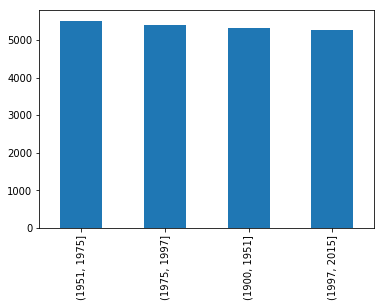

In [32]:
yr_built_bins.value_counts().plot(kind='bar');

In [33]:
features.yr_built = yr_built_bins
features.yr_built = features.yr_built.cat.codes
yr_built_dum = pd.get_dummies(yr_built_bins, prefix='yr_built_') #Binning, getting category codes, and dummy variables

In [34]:
features = pd.concat([features, yr_built_dum], axis=1)
features = features.drop('yr_built', axis=1)

In [35]:
features.zipcode.describe() #Making a decision on what the bins should be

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [36]:
bins = [98001, 98033, 98065, 98118, 98199]

zip_bins = pd.cut(features.zipcode, bins)


In [37]:
features.zipcode = zip_bins
features.zipcode = features.zipcode.cat.codes
zip_dum = pd.get_dummies(zip_bins, prefix='zip')

features = features.drop('zipcode', axis=1)
features = pd.concat([features, zip_dum], axis=1)

## Data Exploration

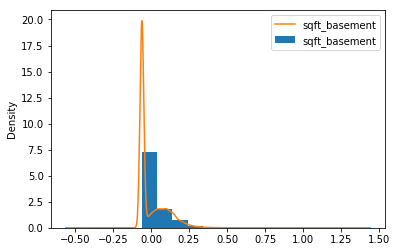

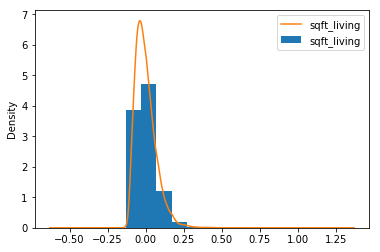

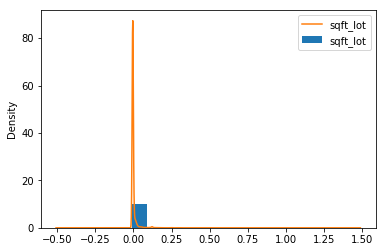

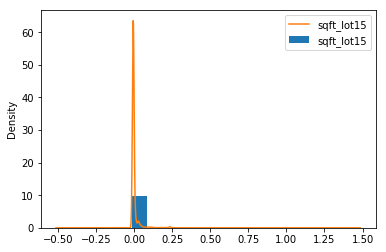

In [38]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    features[column].plot.hist(density=True)
    features[column].plot.kde(label=column)
    plt.legend()
    plt.show() #Looking to fulfill normality assumption

In [39]:
features = features.drop("yr_renovated", axis=1) #Again, it didn't stick from earlier in the notebook.

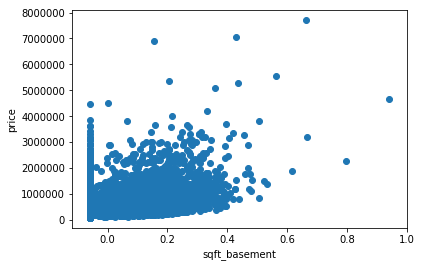

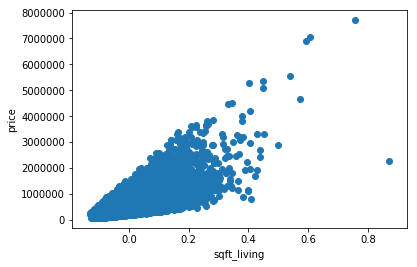

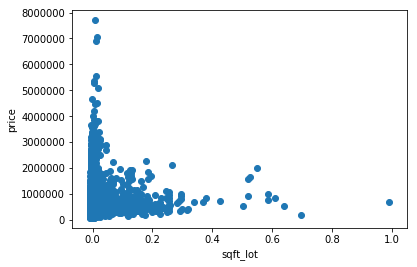

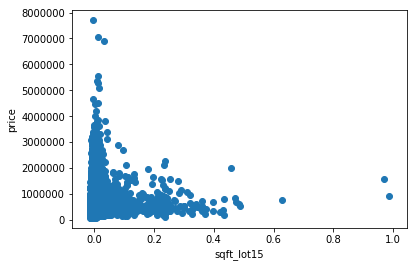

In [40]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    plt.scatter(features[column], target)
    plt.xlabel(column)
    plt.ylabel("price")
    plt.show();#Checking for linearity

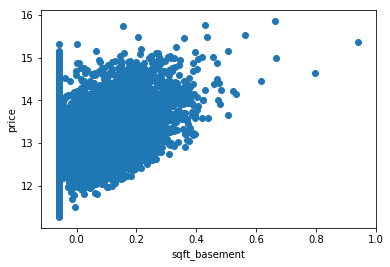

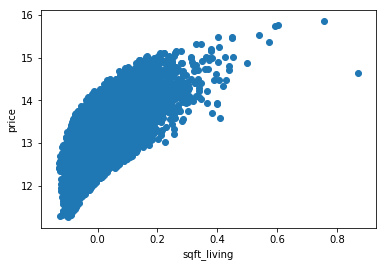

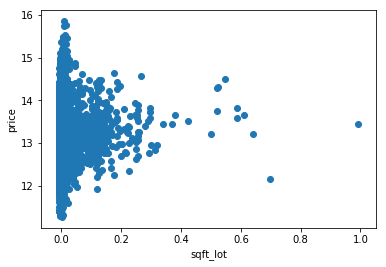

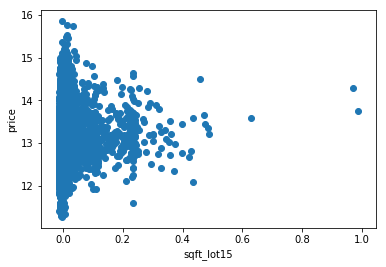

In [41]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    plt.scatter(features[column], np.log(target))
    plt.xlabel(column)
    plt.ylabel("price")
    plt.show(); #checking for linearity with log transformed target

The log transformed target variable increased linearity, but not for sqft_lot or sqft_lot15, and I'm still on the fence about sqft_basement. 

In [42]:
features.drop(['sqft_lot','sqft_lot15'], axis=1, inplace=True) #Dropping for linearity issues

In [43]:
target = np.log(target) #log transforming target 

In [44]:
cleaned_df = pd.concat([target, features], axis=1)

In [45]:
cleaned_df.head()

,price,sqft_living,sqft_basement,bath__0.5,bath__0.75,bath__1.0,bath__1.25,bath__1.5,bath__1.75,bath__2.0,...,grade__12,grade__13,"yr_built__(1900, 1951]","yr_built__(1951, 1975]","yr_built__(1975, 1997]","yr_built__(1997, 2015]","zip_(98001, 98033]","zip_(98033, 98065]","zip_(98065, 98118]","zip_(98118, 98199]"
0,12.309982,-0.068362,-0.059277,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,13.195614,0.037181,0.023710,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,12.100712,-0.099493,-0.059277,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13.311329,-0.009136,0.129519,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,13.142166,-0.030396,-0.059277,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [46]:
from scipy import stats #Remove all outliers with a threshold of 3, or outside three standard deviations. 
cleand_df = cleaned_df[(np.abs(stats.zscore(cleaned_df)) < 3).all(axis=1)]

In [47]:
len(cleaned_df)

21597

## Train-Test-Split

In [48]:
y = cleaned_df.price
X = cleaned_df.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3) #80/20 Train v. Test split

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.09059624118519993
Test Mean Squared Error: 0.09455754332042868


In [49]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 0.09059624118519993
Test Mean Squared Error: 0.09455754332042868


## Modeling

In [50]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [51]:
x_cols = ['sqft_living', 'sqft_basement']
dependent = 'price'
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for i, col in enumerate(x_cols):
    formula = dependent + '~' + col
    model = smf.ols(formula=formula, data=cleaned_df).fit()
    X_new = pd.DataFrame({col: [cleaned_df[col].min(), cleaned_df[col].max()]});
    preds = model.predict(X_new)
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[1+i])
    
pd.DataFrame(results) #Results for just the continuous variables

['sqft_living', 0.483282036851469, 13.048210941923955, 5.2509371017326885, 0.0]
['sqft_basement', 0.09804363539260808, 13.048210941923955, 1.8068642899800222, 0.0]


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.483282,13.0482,5.25094,0
2,sqft_basement,0.0980436,13.0482,1.80686,0


The square footage of living space, basement, and living space of nearby homes seem to have the most influence on housing prices, but the variance in price isn't explained well by any of the independent variables. 

## Take 2 with categorical variables

In [52]:
cleaned_df.columns = [x.strip().replace('.', '_') for x in cleaned_df.columns]
cleaned_df.columns = [x.strip().replace(']', ')') for x in cleaned_df.columns]
cleaned_df.rename({"zip_(98001, 98033)":"zip_98001_98033", 'zip_(98033, 98065)':'zip_98033_98065', 'zip_(98065, 98118)':'zip_98065_98118','zip_(98118, 98199)':'zip_98118_98199','yr_built__(1900, 1951)':'yr_built_1900_1951', 'yr_built__(1951, 1975)':'yr_built_1951_1975','yr_built__(1975, 1997)':'yr_built_1975_1997', 'yr_built__(1997, 2015)':'yr_built_1997_2015'}, axis=1, inplace=True)

In [53]:
cleaned_df.columns

Index(['price', 'sqft_living', 'sqft_basement', 'bath__0_5', 'bath__0_75',
       'bath__1_0', 'bath__1_25', 'bath__1_5', 'bath__1_75', 'bath__2_0',
       'bath__2_25', 'bath__2_5', 'bath__2_75', 'bath__3_0', 'bath__3_25',
       'bath__3_5', 'bath__3_75', 'bath__4_0', 'bath__4_25', 'bath__4_5',
       'bath__4_75', 'bath__5_0', 'bath__5_25', 'bath__5_5', 'bath__5_75',
       'bath__6_0', 'bath__6_25', 'bath__6_5', 'bath__6_75', 'bath__7_5',
       'bath__7_75', 'bath__8_0', 'bed__1', 'bed__2', 'bed__3', 'bed__4',
       'bed__5', 'bed__6', 'bed__7', 'bed__8', 'bed__9', 'bed__10', 'bed__11',
       'bed__33', 'flrs__1_0', 'flrs__1_5', 'flrs__2_0', 'flrs__2_5',
       'flrs__3_0', 'flrs__3_5', 'wf__0_0', 'wf__1_0', 'con__1', 'con__2',
       'con__3', 'con__4', 'con__5', 'grade__3', 'grade__4', 'grade__5',
       'grade__6', 'grade__7', 'grade__8', 'grade__9', 'grade__10',
       'grade__11', 'grade__12', 'grade__13', 'yr_built_1900_1951',
       'yr_built_1951_1975', 'yr_built_1975_19

In [54]:
bath_cols = cleaned_df.columns[3:31]
bed_cols = cleaned_df.columns[32:43]
flrs_cols = cleaned_df.columns[44:49]
wf_cols = cleaned_df.columns[50:51]
condition_cols = cleaned_df.columns[52:56]
grade_cols = cleaned_df.columns[57:67]
yr_built_cols = cleaned_df.columns[68:72]
zip_cols = cleaned_df.columns[72:] #Separating categories for each model, one dropped for the one-hot encoded

In [55]:
cat_cols = [bath_cols, bed_cols, flrs_cols, wf_cols, condition_cols, grade_cols, yr_built_cols, zip_cols]
dependent = 'price'
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for col in cat_cols:
    sum_cols = "+".join(col)
    formula = dependent + '~' + sum_cols
    model = smf.ols(formula=formula, data=cleaned_df).fit()
    print(model.summary()) #Model with initial target
 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     359.6
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:13:30   Log-Likelihood:                -12655.
No. Observations:               21597   AIC:                         2.537e+04
Df Residuals:                   21568   BIC:                         2.560e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2482      0.308     49.569      0.0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2135.
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:13:30   Log-Likelihood:                -9365.6
No. Observations:               21597   AIC:                         1.875e+04
Df Residuals:                   21586   BIC:                         1.884e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0282      0.104    145.102      0.0

Now that we've look at our baselines for categorical and continuous variables, we can move on to using our training set!

## Take 4 with training data

In [56]:
X_train.columns

Index(['sqft_living', 'sqft_basement', 'bath__0.5', 'bath__0.75', 'bath__1.0',
       'bath__1.25', 'bath__1.5', 'bath__1.75', 'bath__2.0', 'bath__2.25',
       'bath__2.5', 'bath__2.75', 'bath__3.0', 'bath__3.25', 'bath__3.5',
       'bath__3.75', 'bath__4.0', 'bath__4.25', 'bath__4.5', 'bath__4.75',
       'bath__5.0', 'bath__5.25', 'bath__5.5', 'bath__5.75', 'bath__6.0',
       'bath__6.25', 'bath__6.5', 'bath__6.75', 'bath__7.5', 'bath__7.75',
       'bath__8.0', 'bed__1', 'bed__2', 'bed__3', 'bed__4', 'bed__5', 'bed__6',
       'bed__7', 'bed__8', 'bed__9', 'bed__10', 'bed__11', 'bed__33',
       'flrs__1.0', 'flrs__1.5', 'flrs__2.0', 'flrs__2.5', 'flrs__3.0',
       'flrs__3.5', 'wf__0.0', 'wf__1.0', 'con__1', 'con__2', 'con__3',
       'con__4', 'con__5', 'grade__3', 'grade__4', 'grade__5', 'grade__6',
       'grade__7', 'grade__8', 'grade__9', 'grade__10', 'grade__11',
       'grade__12', 'grade__13', 'yr_built__(1900, 1951]',
       'yr_built__(1951, 1975]', 'yr_built__(1975, 

In [57]:
X_train.columns = [x.strip().replace('.', '_') for x in X_train.columns]
X_train.columns = [x.strip().replace(']', ')') for x in X_train.columns]
X_train.rename({"zip_(98001, 98033)":"zip_98001_98033", 'zip_(98033, 98065)':'zip_98033_98065', 'zip_(98065, 98118)':'zip_98065_98118','zip_(98118, 98199)':'zip_98118_98199','yr_built__(1900, 1951)':'yr_built_1900_1951', 'yr_built__(1951, 1975)':'yr_built_1951_1975','yr_built__(1975, 1997)':'yr_built_1975_1997', 'yr_built__(1997, 2015)':'yr_built_1997_2015'}, axis=1, inplace=True)
X_train = X_train.drop(["bath__8_0", 'bed__33', 'flrs__3_5', 'con__5', 'grade__13', 'zip_98118_98199', 'yr_built_1997_2015', 'wf__1_0'], axis=1) #Dropping column from categorical variables

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [58]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)#Modeling with sklearn

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
print(linreg.intercept_) #Modeling with sklearn
linreg.coef_

12.84452701360668


array([ 2.73938443,  0.24012358,  0.68854764,  1.02644231,  1.00824092,
        1.29225481,  1.04186609,  1.09709873,  1.09187102,  1.13361109,
        1.10681577,  1.14100888,  1.15068549,  1.20716511,  1.16625448,
        1.26730593,  1.19803393,  1.20104583,  1.20743943,  1.20313539,
        1.26419164,  1.29792188,  1.20439192,  0.88232857,  1.52073545,
        1.08194796,  0.77916509,  1.03477951,  1.27741595,  1.54801558,
       -0.08637346, -0.08471694, -0.14232242, -0.17532502, -0.19846577,
       -0.22514472, -0.26490705, -0.19028256, -0.41803322, -0.24356444,
       -0.46410542, -0.00528618,  0.04844419,  0.01593824,  0.0854037 ,
        0.13000754, -0.0242189 , -0.22660184, -0.27605279, -0.10638405,
       -0.0662464 , -1.32175141, -1.61455016, -1.41780518, -1.22785886,
       -0.94945521, -0.71771489, -0.48485432, -0.31545752, -0.20467354,
       -0.02391   ,  0.34486025,  0.12280283, -0.01824978,  0.03668388,
        0.0313421 ,  0.1427849 ])

In [60]:
import statsmodels.api as sm #Modeling with statsmodels
features_int = sm.add_constant(X_train)
model = sm.OLS(y_train,features_int).fit()
model.summary()

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     496.6
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:13:31   Log-Likelihood:                -4164.2
No. Observations:               17277   AIC:                             8464.
Df Residuals:                   17209   BIC:                             8992.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.8445      0.409     31.413      0.000      12.043      13.646
sqft_living            2.7394      0.082     33.563      0.000       2.579       2.899
sqft_basement          0.2401      0.036      6.601      0.000       0.169       0.311
bath__0_5              0.6885      0.281      2.452      0.014       0.138       1.239
bath__0_75             1.0264      0.239      4.294      0.000       0.558       1.495
bath__1_0              1.0082      0.235      4.295      0.000       0.548       1.468
bath__1_25             1.2923      0.262      4.936      0.000       0.779       1.805
bath__1_5              1.0419      0.235      4.442      0.000       0.582       1.502
bath__1_75             1.0971      0.234      4.682      0.000       0.638       1.556
bath__2_0              1.0919      0.234      4.660      0.000       0.633       1.551
bath__2_25             1.1336      0.234      4.842      0.000       0.675       1.592
bath__2_5              1.1068      0.234      4.732      0.000       0.648       1.565
bath__2_75             1.1410      0.234      4.879      0.000       0.683       1.599
bath__3_0              1.1507      0.234      4.921      0.000       0.692       1.609
bath__3_25             1.2072      0.234      5.167      0.000       0.749       1.665
bath__3_5              1.1663      0.233      4.996      0.000       0.709       1.624
bath__3_75             1.2673      0.234      5.408      0.000       0.808       1.727
bath__4_0              1.1980      0.234      5.123      0.000       0.740       1.656
bath__4_25             1.2010      0.235      5.109      0.000       0.740       1.662
bath__4_5              1.2074      0.235      5.144      0.000       0.747       1.668
bath__4_75             1.2031      0.241      5.002      0.000       0.732       1.675
bath__5_0              1.2642      0.243      5.194      0.000       0.787       1.741
bath__5_25             1.2979      0.253      5.138      0.000       0.803       1.793
bath__5_5              1.2044      0.246      4.897      0.000       0.722       1.686
bath__5_75             0.8823      0.271      3.251      0.001       0.350       1.414
bath__6_0              1.5207      0.279      5.452      0.000       0.974       2.067
bath__6_25             1.0819      0.312      3.465      0.001       0.470       1.694
bath__6_5              0.7792      0.317      2.455      0.014       0.157       1.401
bath__6_75             1.0348      0.385      2.688      0.007       0.280       1.789
bath__7_5              1.2774      0.417      3.063      0.002       0.460       2.095
bath__7_75             1.5480      0.384      4.026      0.000       0.794       2.302
bed__1                -0.0864      0.310     -0.279      0.780      -0.694       0.521
bed__2                -0.0847      0.3

### Feature Selection

In [61]:
X_train.shape 

(17277, 67)

We most likely can cut out 2/3 of the variables based on the p-values from the statsmodels model

In [62]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 30)
selector = selector.fit(X_train, y_train)

print(selector.support_ )
selector.ranking_


[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False]


array([ 1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 18, 19, 17, 16,
       15, 13, 12, 14, 11, 10,  9, 38, 31, 34, 30, 27, 35, 24, 21, 28, 29,
        5,  1,  2,  4,  6,  8, 20, 22, 23, 36,  3, 25, 37, 32, 33, 26])

In [63]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 4.97009446  1.41873143  1.77330057  1.80118156  2.24569506  1.82181915
  1.85129602  1.84544067  1.87260026  1.81974501  1.87957384  1.89049421
  2.020213    1.9248169   2.0528457   1.97861925  1.9446496   1.86669236
  1.92219426  1.86107774  1.9618981   1.74300505  1.37242642  2.09086996
  1.37423255  1.3288986   1.29909505  1.06898242  1.59366207 -0.38843477]
11.204703317817055


In [64]:
selected_columns = X_train.columns[selector.support_ ]
linreg.fit(X_train[selected_columns],y_train)
print(linreg.intercept_) #Modeling with sklearn
linreg.coef_

11.204703317817055


array([ 4.97009446,  1.41873143,  1.77330057,  1.80118156,  2.24569506,
        1.82181915,  1.85129602,  1.84544067,  1.87260026,  1.81974501,
        1.87957384,  1.89049421,  2.020213  ,  1.9248169 ,  2.0528457 ,
        1.97861925,  1.9446496 ,  1.86669236,  1.92219426,  1.86107774,
        1.9618981 ,  1.74300505,  1.37242642,  2.09086996,  1.37423255,
        1.3288986 ,  1.29909505,  1.06898242,  1.59366207, -0.38843477])

In [65]:
X_train_RFE = X_train[selected_columns]

In [66]:
features_int = sm.add_constant(X_train_RFE)
model = sm.OLS(y_train,features_int).fit()
model.summary()

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     570.7
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:13:34   Log-Likelihood:                -7504.2
No. Observations:               17277   AIC:                         1.507e+04
Df Residuals:                   17246   BIC:                         1.531e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2047      0.269     41.580      0.000      10.677      11.733
sqft_living     4.9701      0.064     77.737      0.000       4.845       5.095
bath__0_5       1.4187      0.329      4.317      0.000       0.775       2.063
bath__0_75      1.7733      0.276      6.432      0.000       1.233       2.314
bath__1_0       1.8012      0.270      6.660      0.000       1.271       2.331
bath__1_25      2.2457      0.305      7.371      0.000       1.648       2.843
bath__1_5       1.8218      0.270      6.742      0.000       1.292       2.351
bath__1_75      1.8513      0.270      6.860      0.000       1.322       2.380
bath__2_0       1.8454      0.270      6.837      0.000       1.316       2.374
bath__2_25      1.8726      0.270      6.946      0.000       1.344       2.401
bath__2_5       1.8197      0.269      6.758      0.000       1.292       2.348
bath__2_75      1.8796      0.269      6.981      0.000       1.352       2.407
bath__3_0       1.8905      0.269      7.020      0.000       1.363       2.418
bath__3_25      2.0202      0.269      7.510      0.000       1.493       2.548
bath__3_5       1.9248      0.269      7.162      0.000       1.398       2.452
bath__3_75      2.0528      0.270      7.598      0.000       1.523       2.582
bath__4_0       1.9786      0.270      7.324      0.000       1.449       2.508
bath__4_25      1.9446      0.271      7.169      0.000       1.413       2.476
bath__4_5       1.8667      0.271      6.894      0.000       1.336       2.397
bath__4_75      1.9222      0.280      6.856      0.000       1.373       2.472
bath__5_0       1.8611      0.282      6.609      0.000       1.309       2.413
bath__5_25      1.9619      0.292      6.713      0.000       1.389       2.535
bath__5_5       1.7430      0.291      5.985      0.000       1.172       2.314
bath__5_75      1.3724      0.325      4.222      0.000       0.735       2.010
bath__6_0       2.0909      0.325      6.424      0.000       1.453       2.729
bath__6_25      1.3742      0.375      3.669      0.000       0.640       2.108
bath__6_5       1.3289      0.375      3.543      0.000       0.594       2.064
bath__6_75      1.2991      0.458      2.835      0.005       0.401       2.197
bath__7_5       1.0690      0.460      2.324      0.020       0.167       1.970
bath__7_75      1.5937      0.458      3.478      0.001       0.696       2.492
grade__4       -0.3884      0.086     -4.497      0.000      -0.558      -0.219
==============================================================================
Omnibus:                       56.483   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.187
Skew:                           0.064   Prob(JB):                     5.67e-11
Kurtosis:                       2.778   Cond. N

The Recurive Feature Selection method dropped the r2 value way too far. Let's try stepwise selection:

In [67]:
import statsmodels.api as sm

def stepwise_selection(X_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_train.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [68]:
select_features = stepwise_selection(X_train, y_train)

Add  flrs__2_0                      with p-value 0.0
Add  grade__7                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zip_98065_98118                with p-value 4.29478e-280
Add  grade__6                       with p-value 3.41999e-205
Add  yr_built_1900_1951             with p-value 8.77118e-272
Add  grade__5                       with p-value 5.37748e-165
Add  grade__8                       with p-value 2.04729e-187
Add  grade__4                       with p-value 5.69678e-56
Add  grade__9                       with p-value 2.33929e-61
Add  yr_built_1951_1975             with p-value 9.87756e-51
Add  bath__1_0                      with p-value 2.7157e-22
Add  flrs__3_0                      with p-value 2.09314e-16
Drop flrs__2_0                      with p-value 0.0596988


C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  con__3                         with p-value 7.83952e-20
Add  con__2                         with p-value 1.32549e-17
Add  grade__10                      with p-value 1.54773e-14
Add  con__4                         with p-value 4.52437e-13
Add  bed__2                         with p-value 1.76893e-11
Add  bath__1_5                      with p-value 8.8435e-10
Add  sqft_basement                  with p-value 5.20099e-08
Add  flrs__1_0                      with p-value 2.66433e-08
Add  bed__3                         with p-value 2.30417e-07
Add  bath__3_25                     with p-value 2.90996e-06
Add  bath__3_75                     with p-value 3.3976e-05
Add  grade__12                      with p-value 1.66359e-05
Add  grade__3                       with p-value 0.000335233
Add  con__1                         with p-value 0.000516096
Add  bath__2_5                      with p-value 0.00050931
Add  wf__0_0                        with p-value 0.00107591
Add  zip_98001_98033        

In [69]:
features_int = sm.add_constant(X_train[select_features])
model = sm.OLS(y_train,features_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     919.6
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:15:21   Log-Likelihood:                -4203.0
No. Observations:               17277   AIC:                             8480.
Df Residuals:                   17240   BIC:                             8767.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.6854      0.027    506.943      0.000      13.632      13.738
grade__7              -0.7740      0.022    -35.143      0.000      -0.817      -0.731
sqft_living            2.7275      0.075     36.409      0.000       2.581       2.874
zip_98065_98118        0.1417      0.007     21.107      0.000       0.129       0.155
grade__6              -1.0538      0.024    -43.480      0.000      -1.101      -1.006
yr_built_1900_1951     0.3388      0.010     33.749      0.000       0.319       0.359
grade__5              -1.2499      0.033    -38.115      0.000      -1.314      -1.186
grade__8              -0.5401      0.021    -25.756      0.000      -0.581      -0.499
grade__4              -1.4793      0.074    -19.912      0.000      -1.625      -1.334
grade__9              -0.3035      0.020    -15.069      0.000      -0.343      -0.264
yr_built_1951_1975     0.1159      0.009     12.205      0.000       0.097       0.135
bath__1_0             -0.1269      0.011    -11.619      0.000      -0.148      -0.105
flrs__3_0              0.0774      0.018      4.323      0.000       0.042       0.112
con__3                -0.1082      0.009    -11.436      0.000      -0.127      -0.090
con__2                -0.2776      0.028     -9.968      0.000      -0.332      -0.223
grade__10             -0.1262      0.020     -6.163      0.000      -0.166      -0.086
con__4                -0.0684      0.010     -7.066      0.000      -0.087      -0.049
bed__2                 0.0907      0.010      9.361      0.000       0.072       0.110
bath__1_5             -0.0961      0.012     -8.351      0.000      -0.119      -0.074
sqft_basement          0.2360      0.036      6.548      0.000       0.165       0.307
flrs__1_0             -0.0552      0.009     -5.945      0.000      -0.073      -0.037
bed__3                 0.0351      0.006      5.907      0.000       0.023       0.047
bath__3_25             0.0559      0.015      3.694      0.000       0.026       0.086
bath__3_75             0.1093      0.029      3.774      0.000       0.053       0.166
grade__12              0.1695      0.040      4.256      0.000       0.091       0.248
grade__3              -1.2492      0.311     -4.013      0.000      -1.859      -0.639
con__1                -0.2295      0.064     -3.578      0.000      -0.355      -0.104
bath__2_5             -0.0365      0.007     -5.177      0.000      -0.050      -0.023
wf__0_0               -0.0238      0.007     -3.255      0.001      -0.038      -0.009
zip_98001_98033        0.0364      0.007      5.000      0.000       0.022       0.051
zip_98033_98065        0.0308      0.007      4.124      0.000       0.016       0.045
bed__1                 0.0807      0.027      3.026      0.002       0.028       0.133
yr_built_1975_1997    -0.0227      0.0

Much better!

### K Fold Cross Validation

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = cleaned_df.drop('price', axis=1)
y = cleaned_df.loc[:,'price']
cv_10_results = cross_val_score(linreg, X[select_features], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.09847899, -0.1031627 , -0.09576246, -0.10039674, -0.09287951,
       -0.10016575, -0.09616686, -0.1073363 , -0.09677279, -0.07354318])

## Model Validation

### Checking for linearity

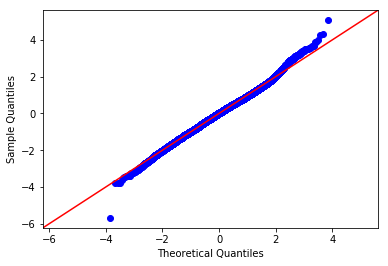

In [71]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for homoscedasticity

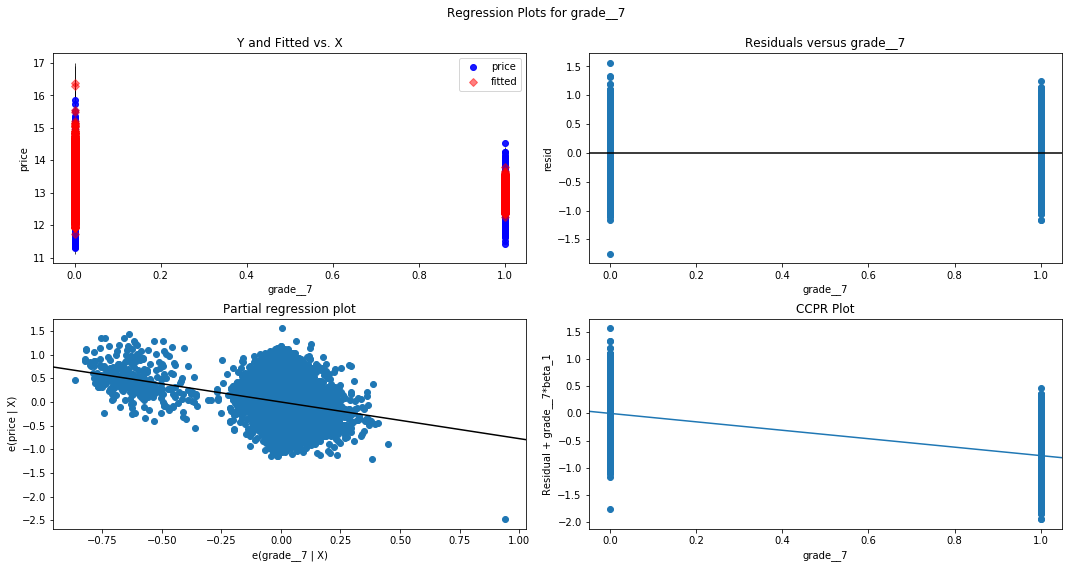

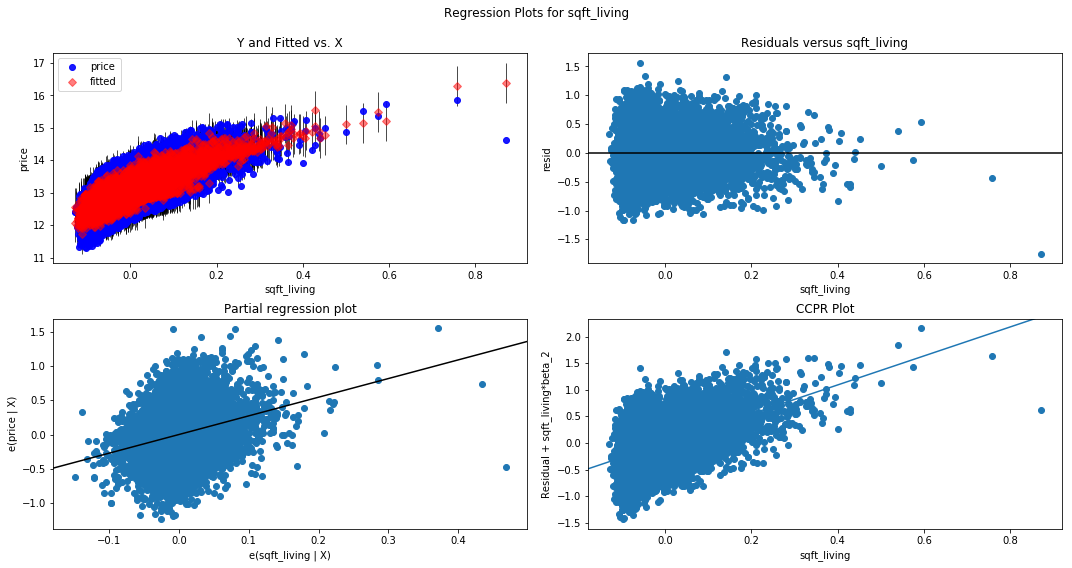

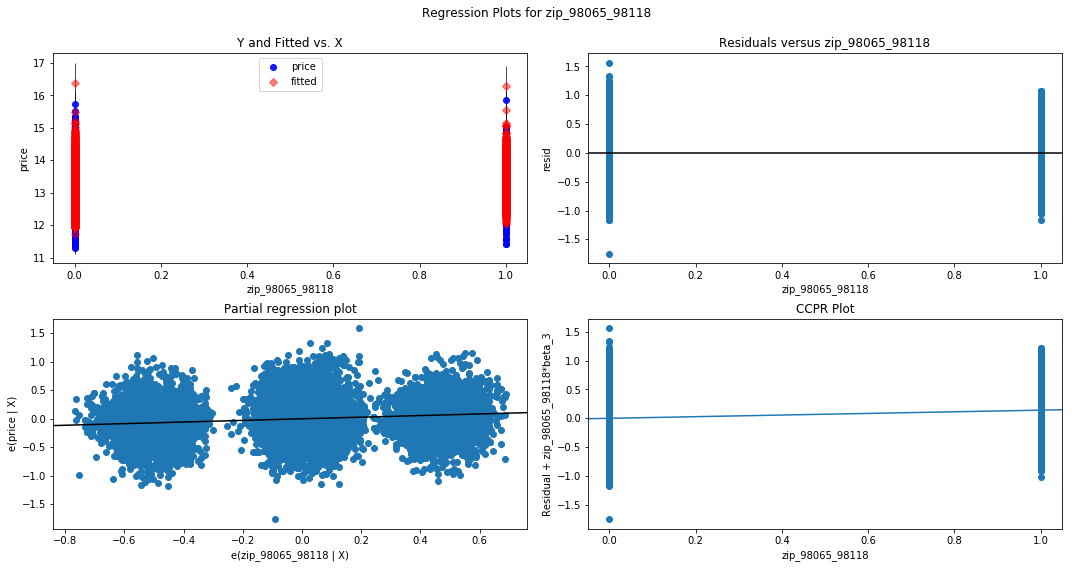

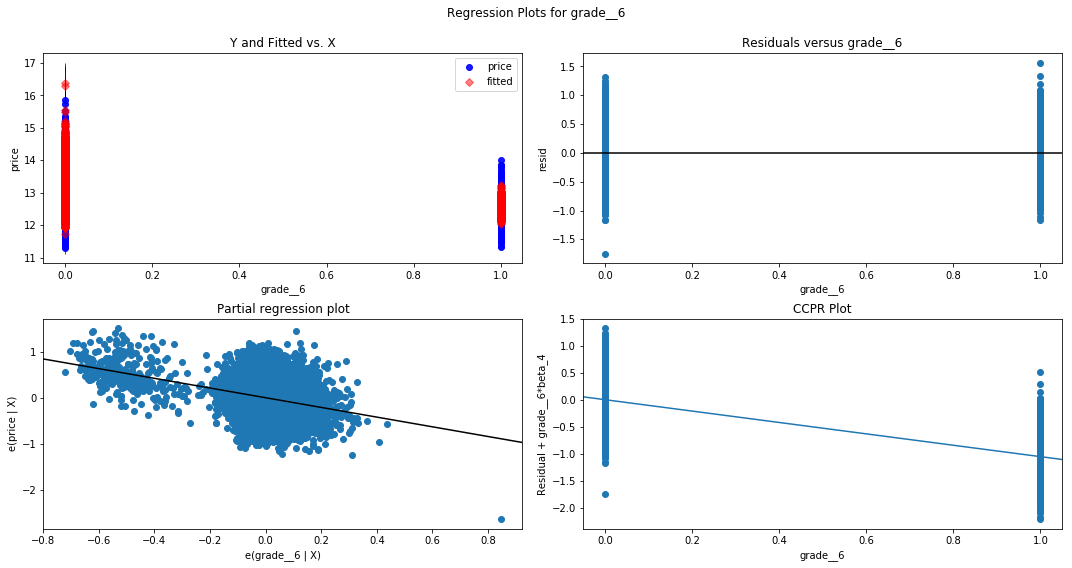

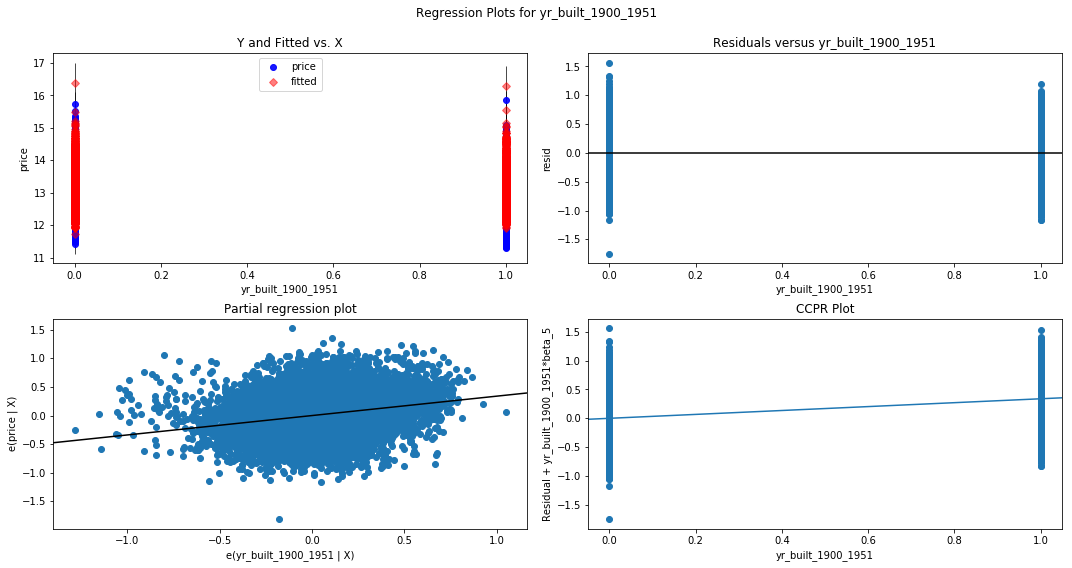

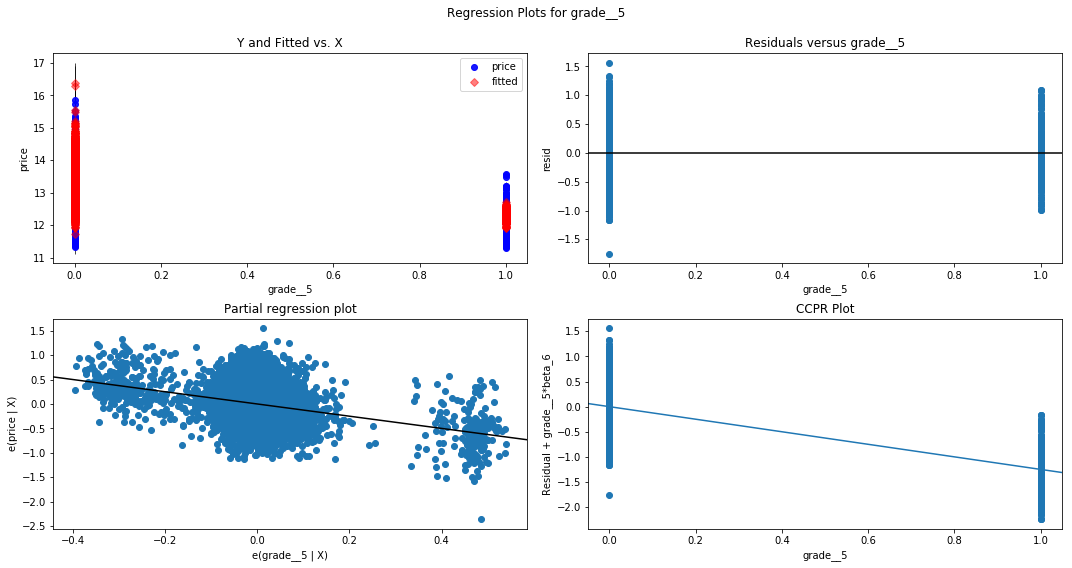

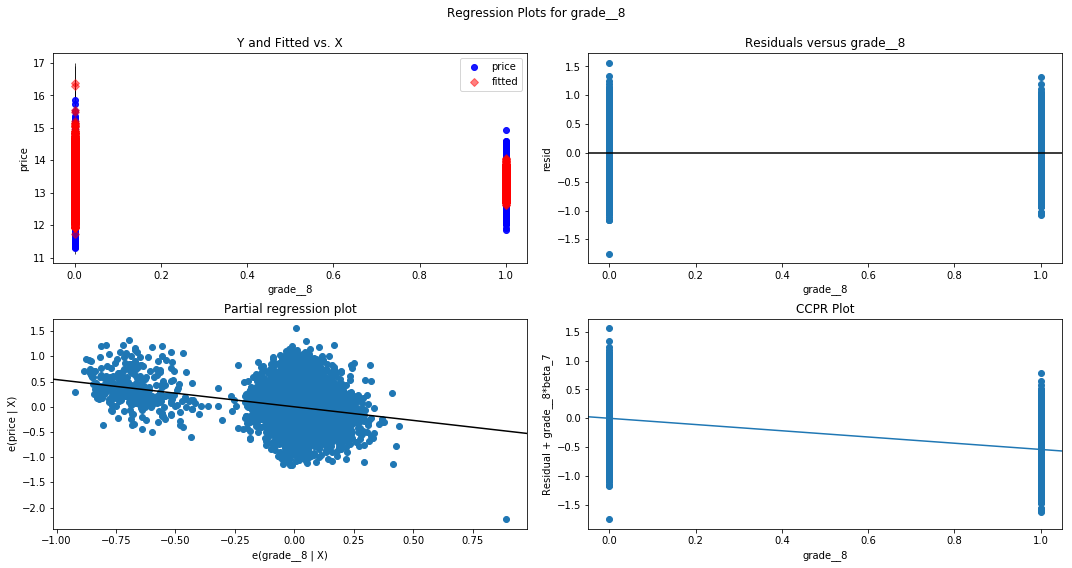

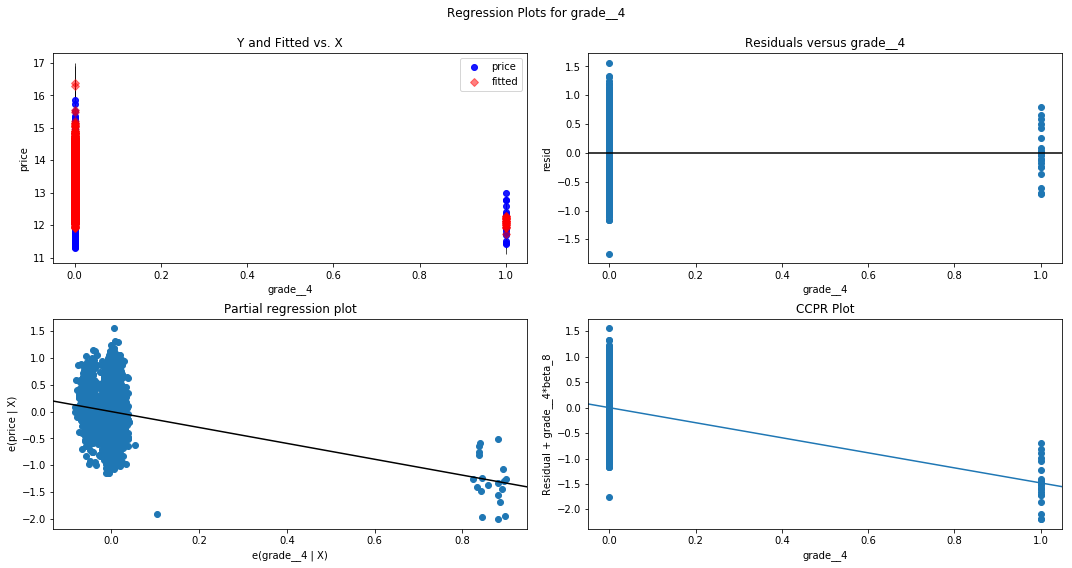

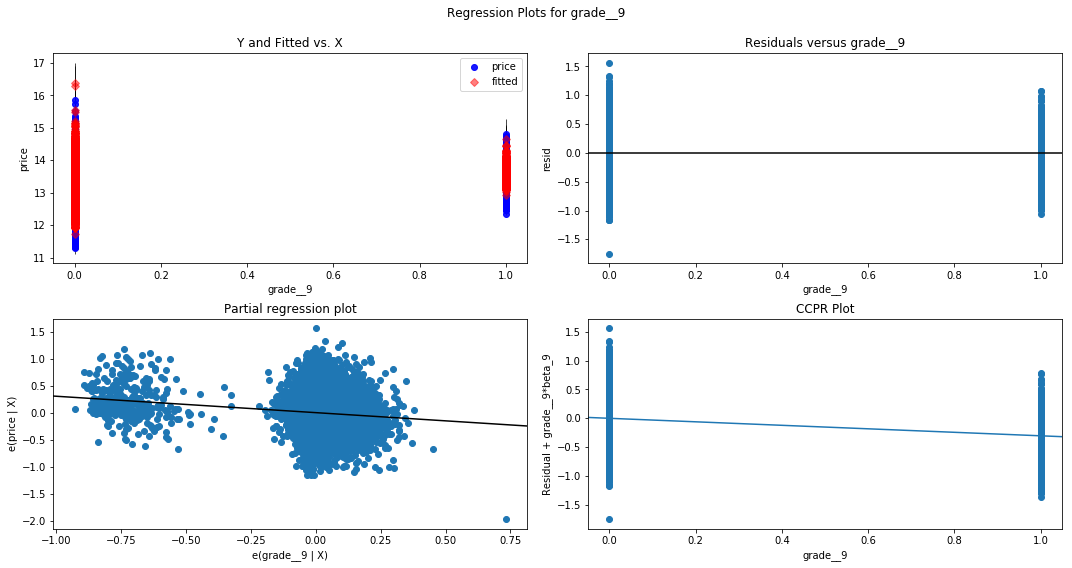

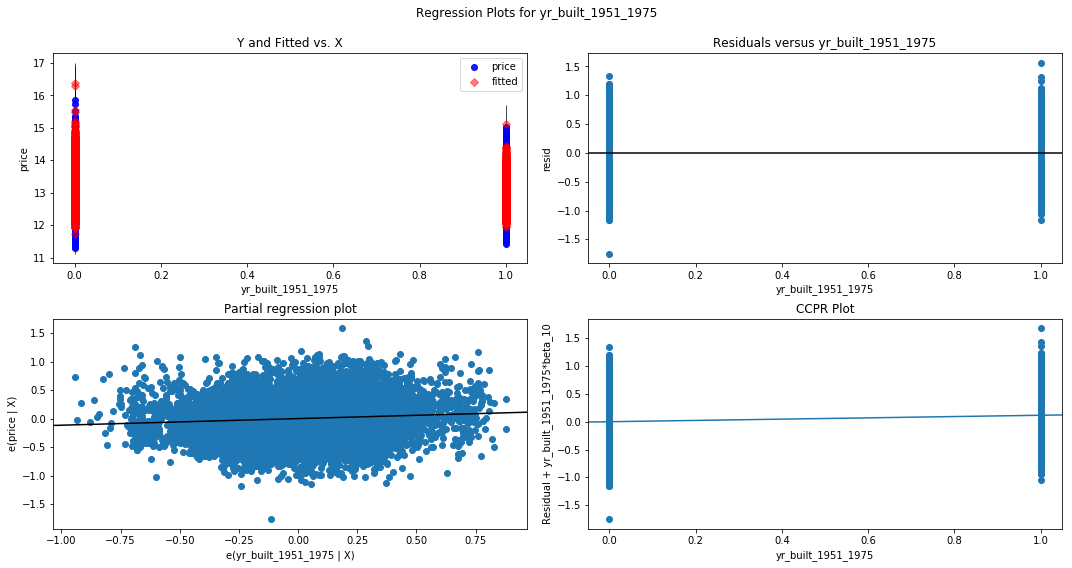

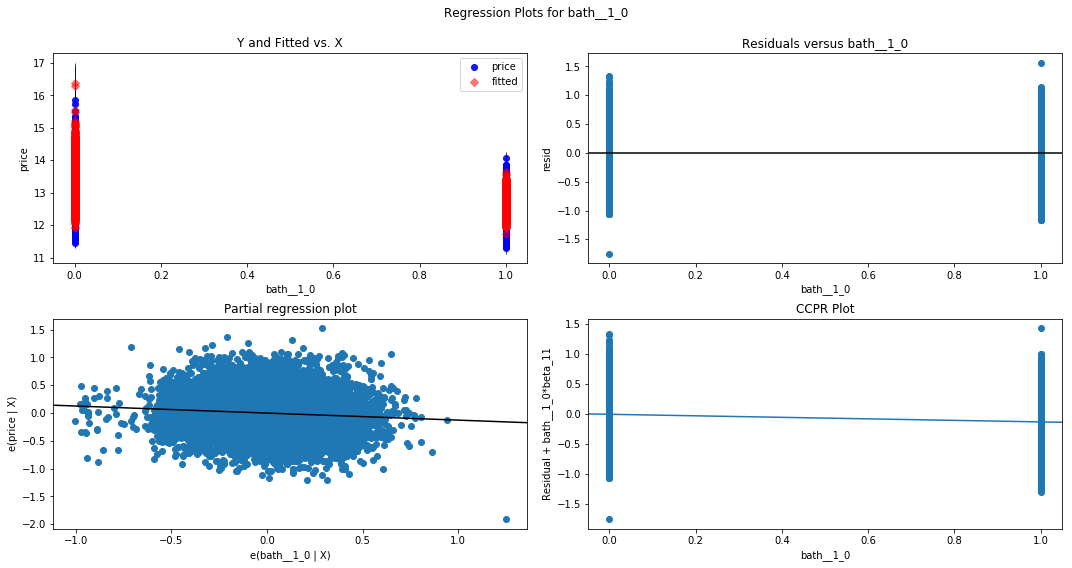

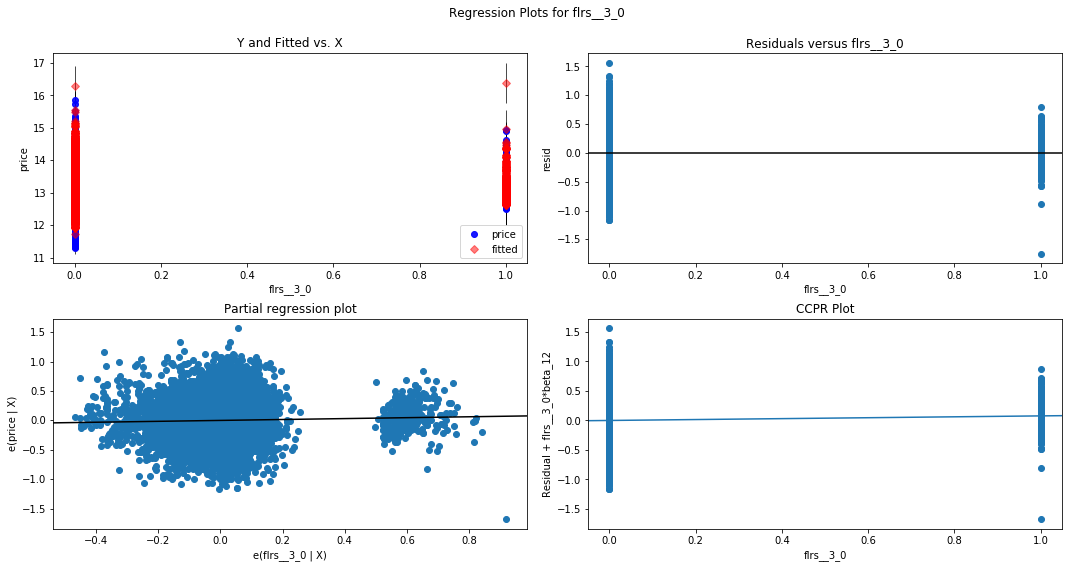

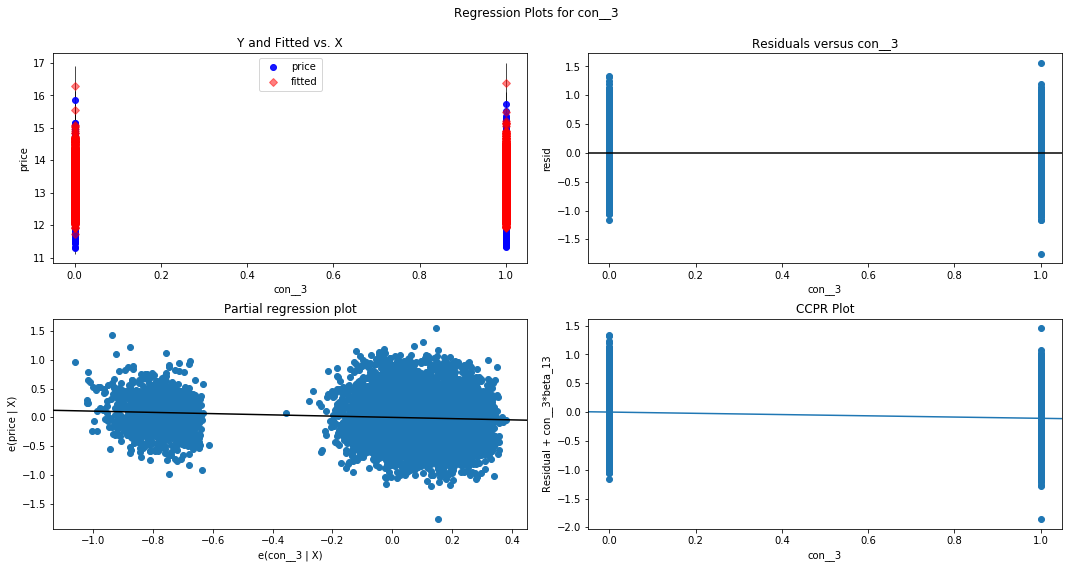

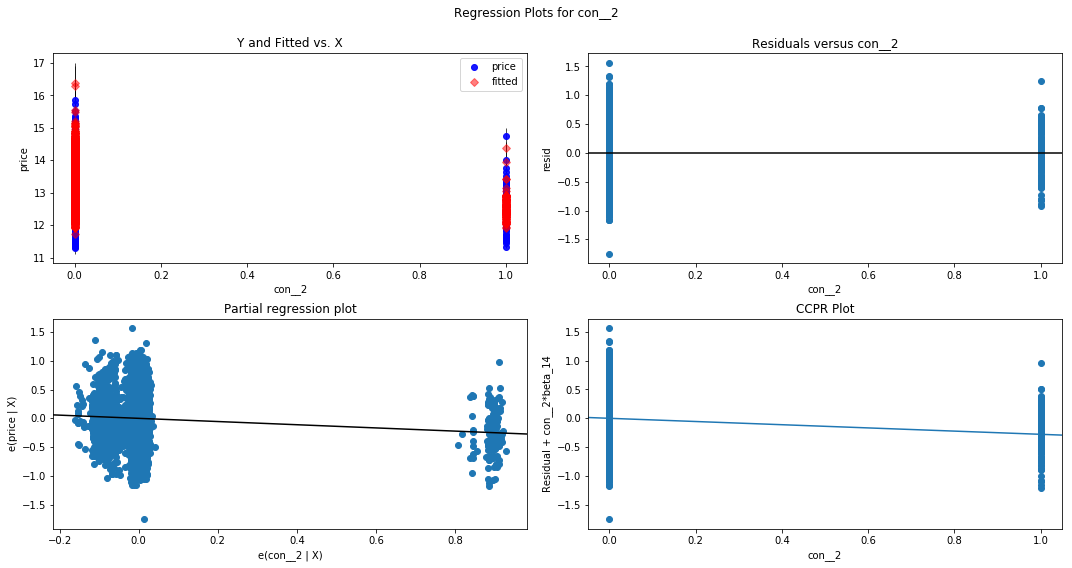

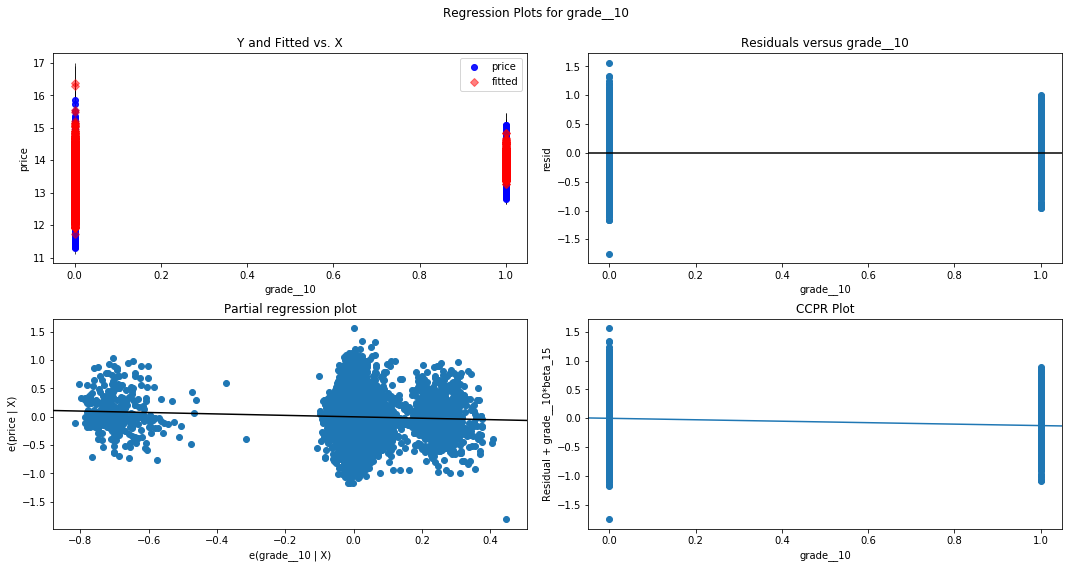

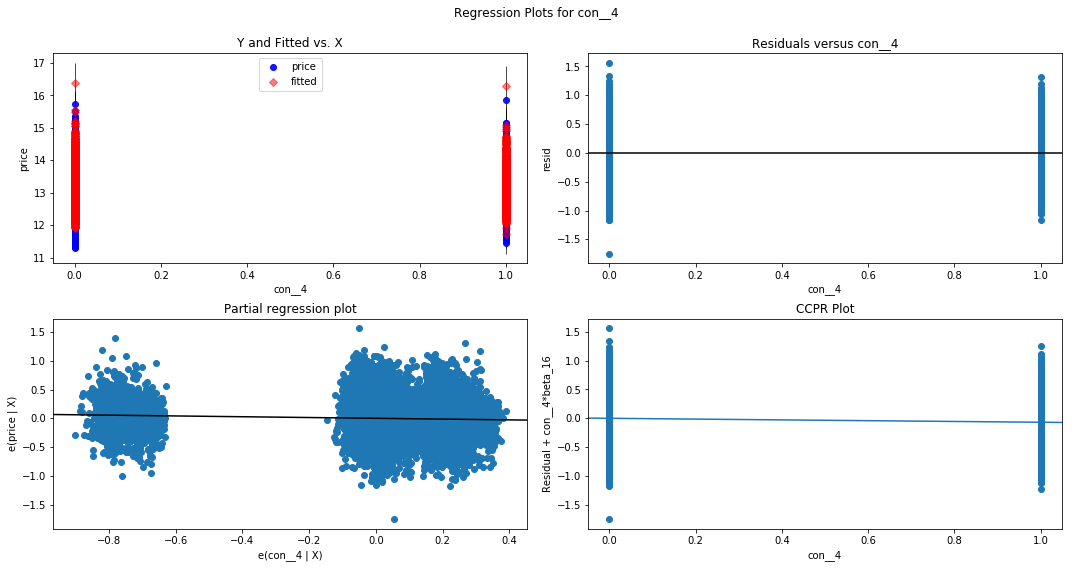

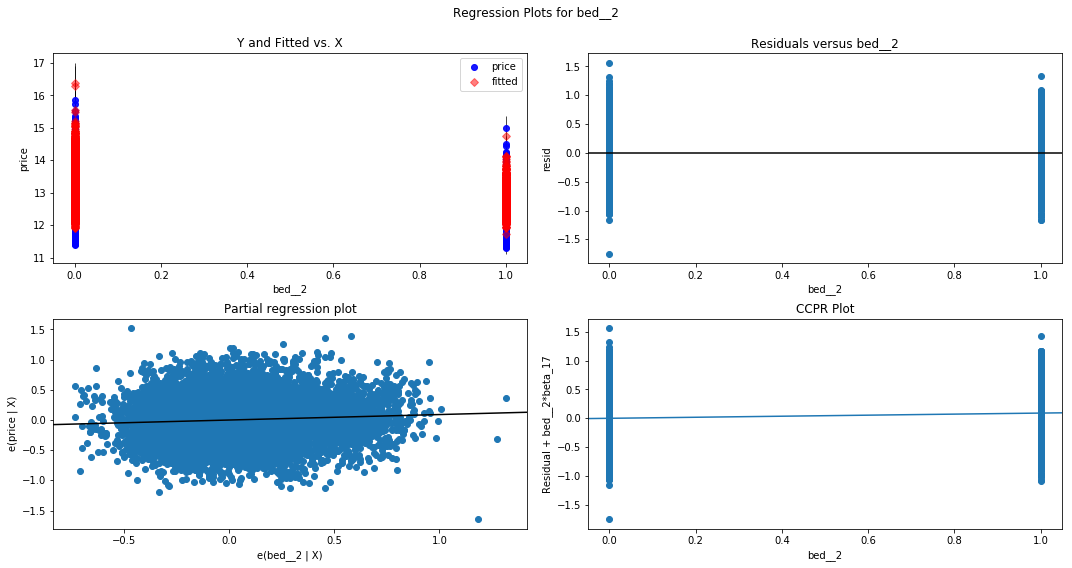

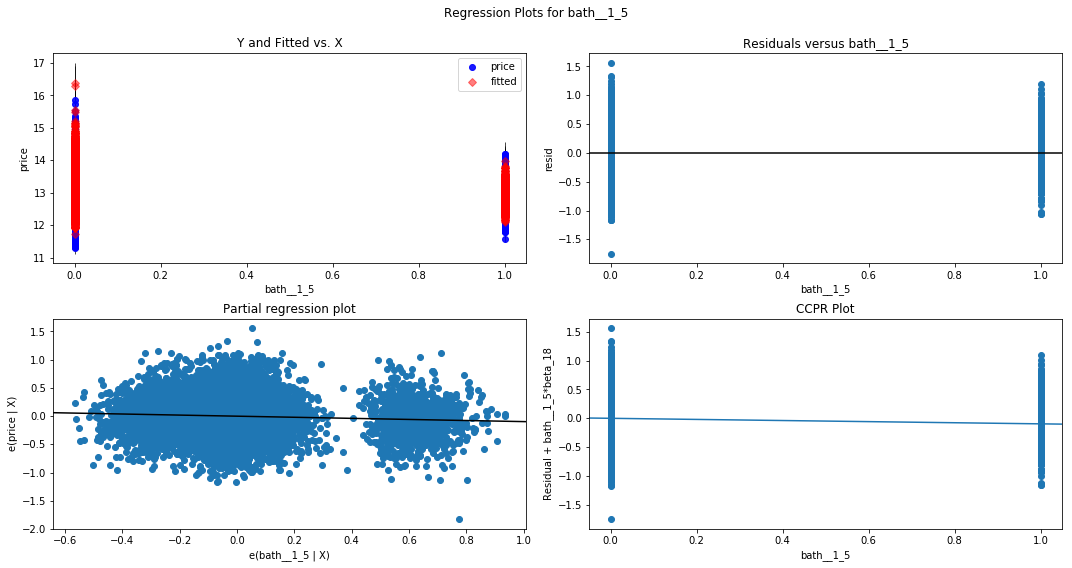

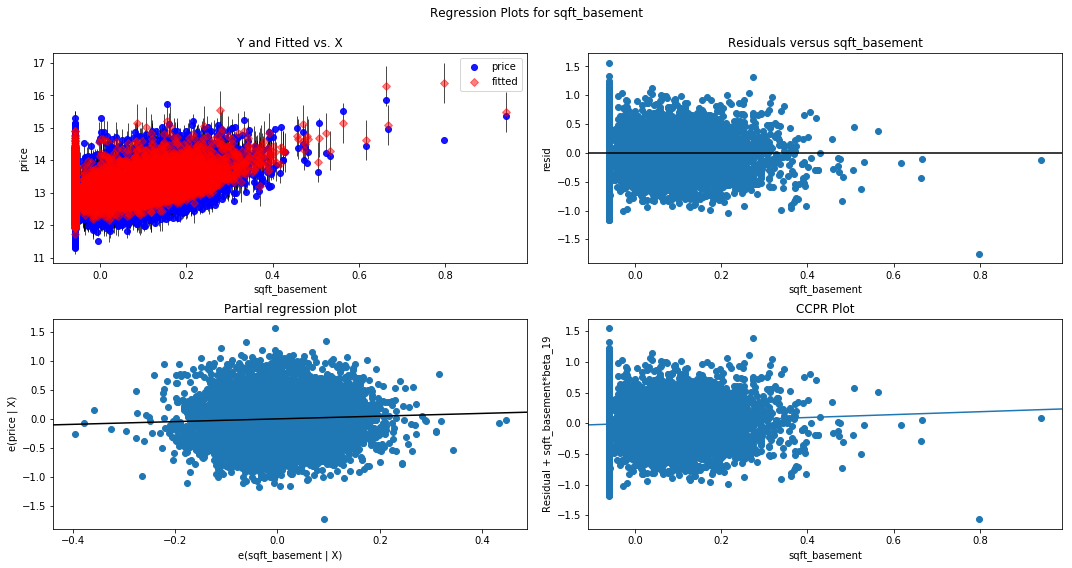

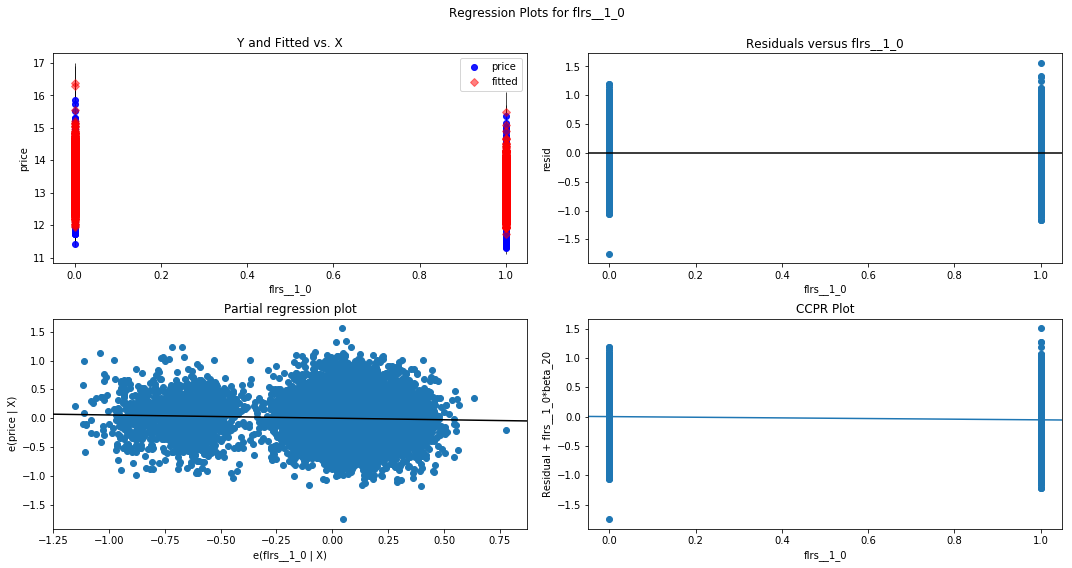

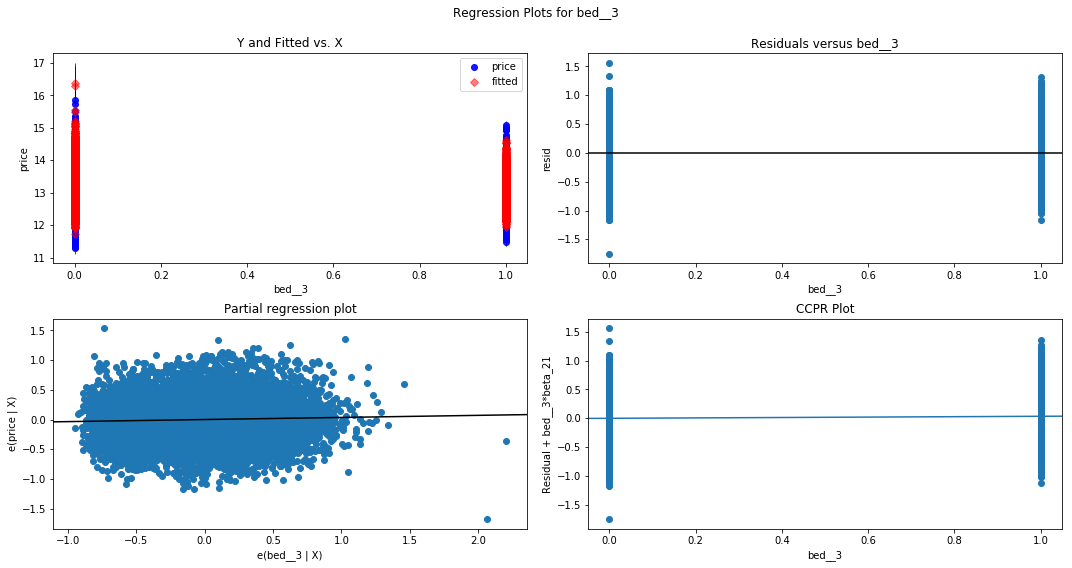

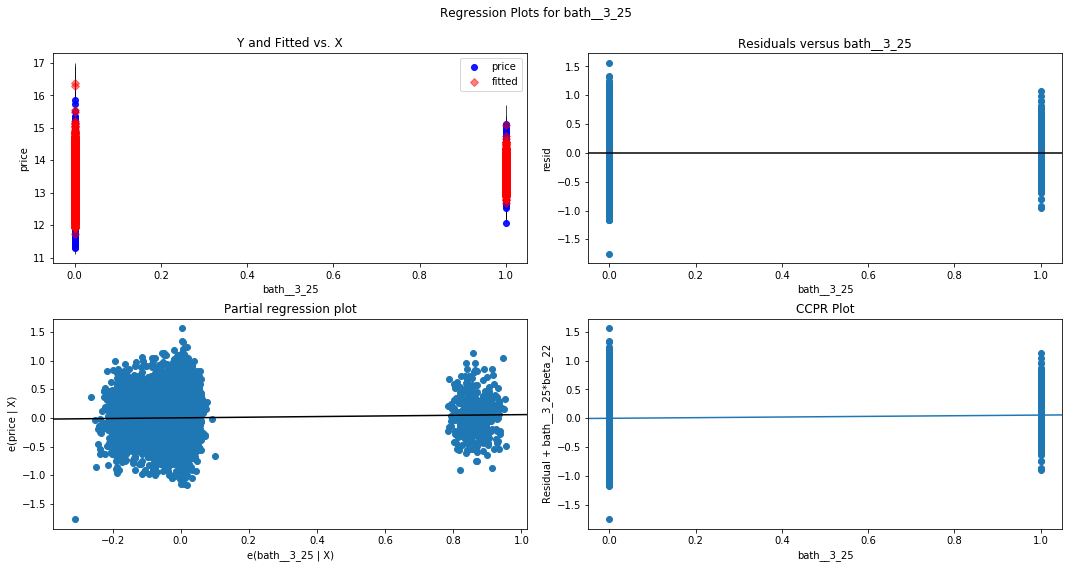

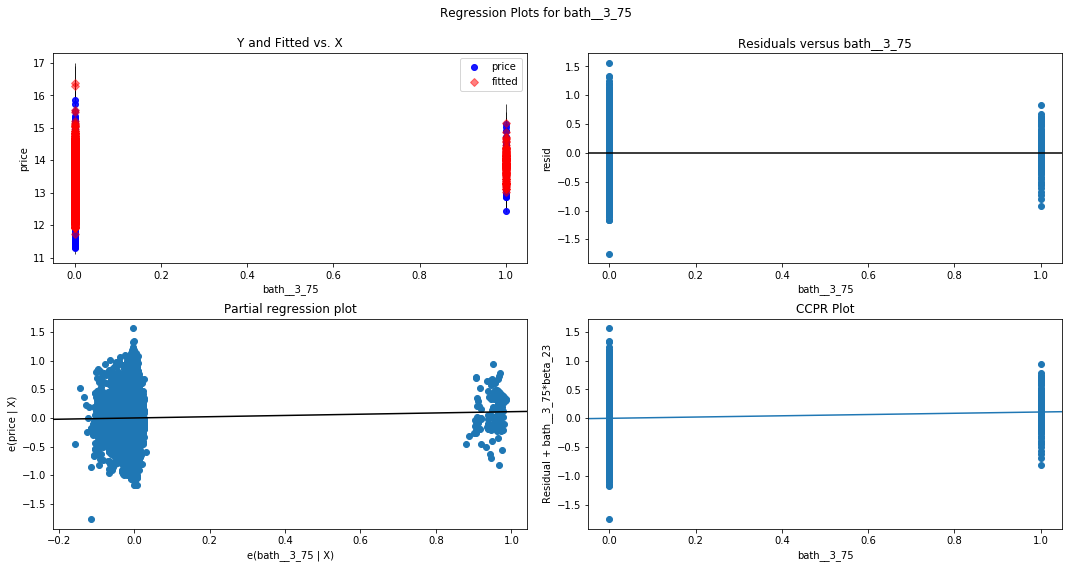

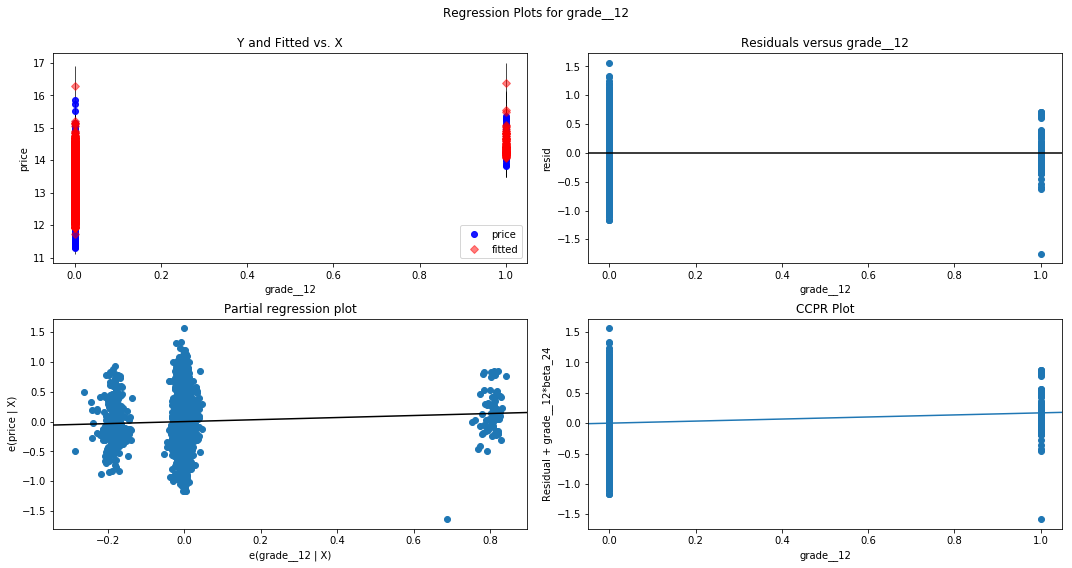

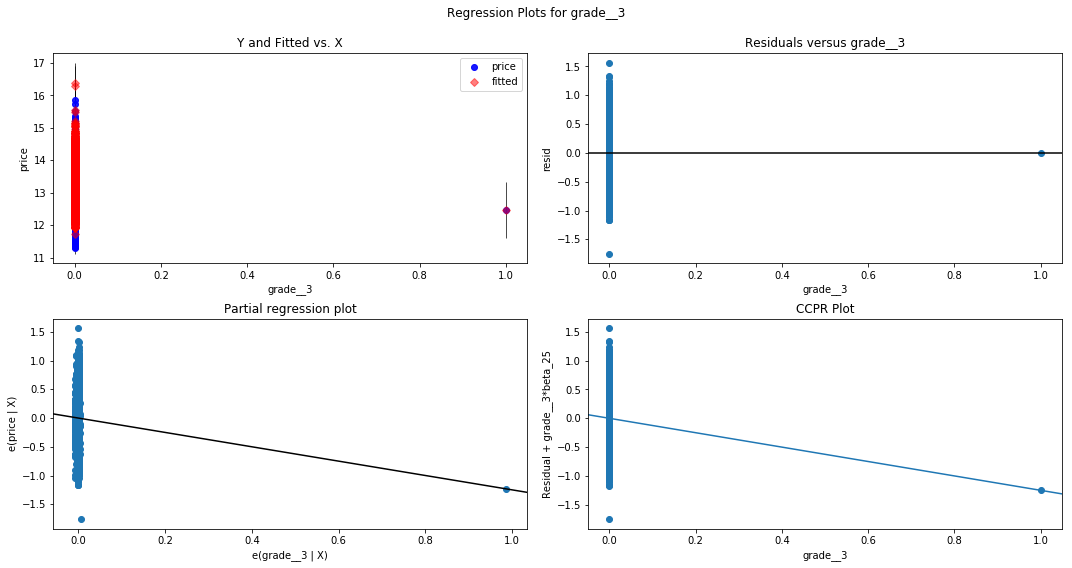

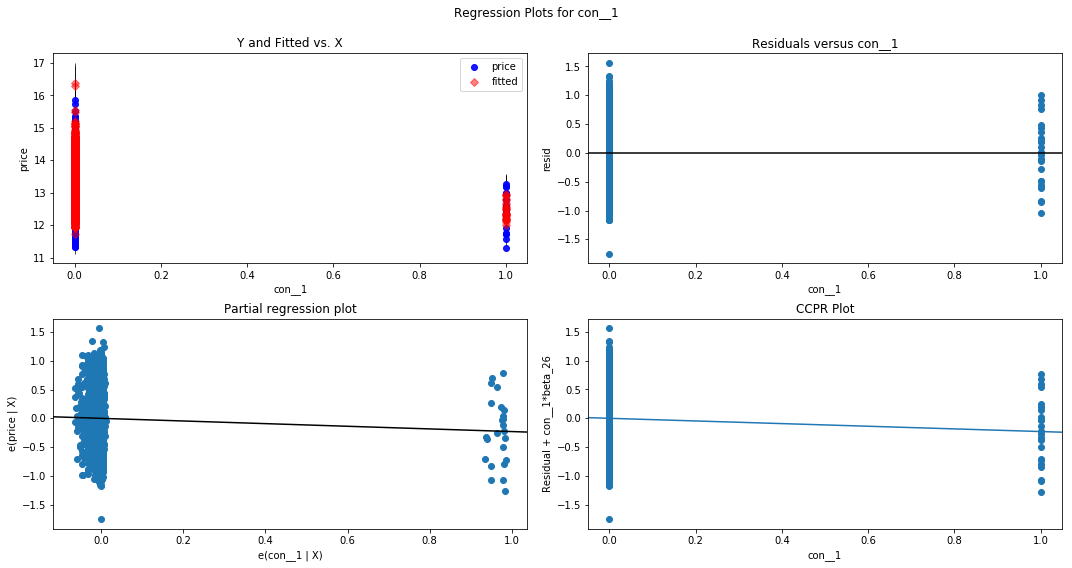

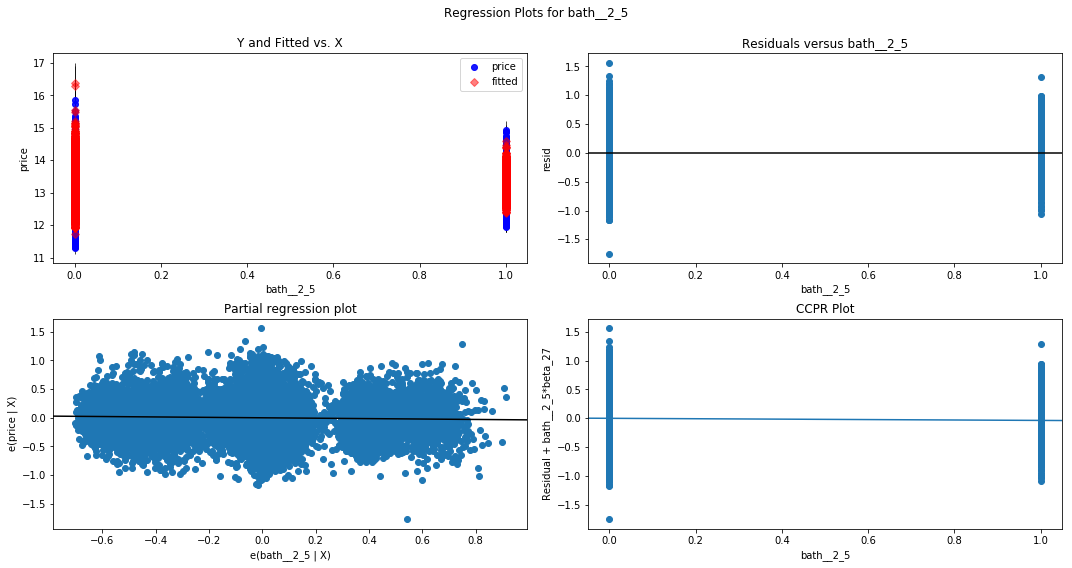

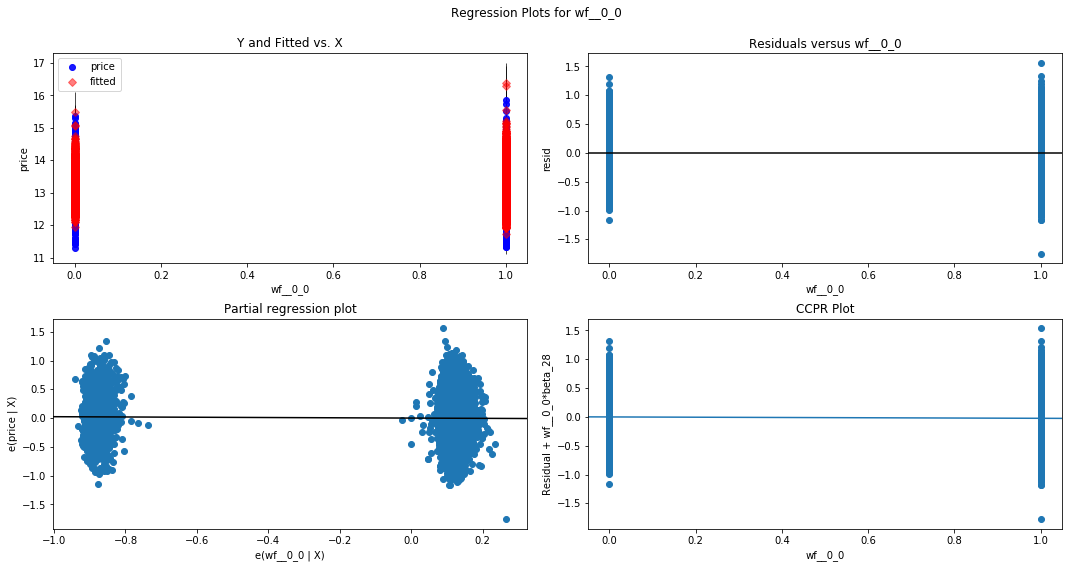

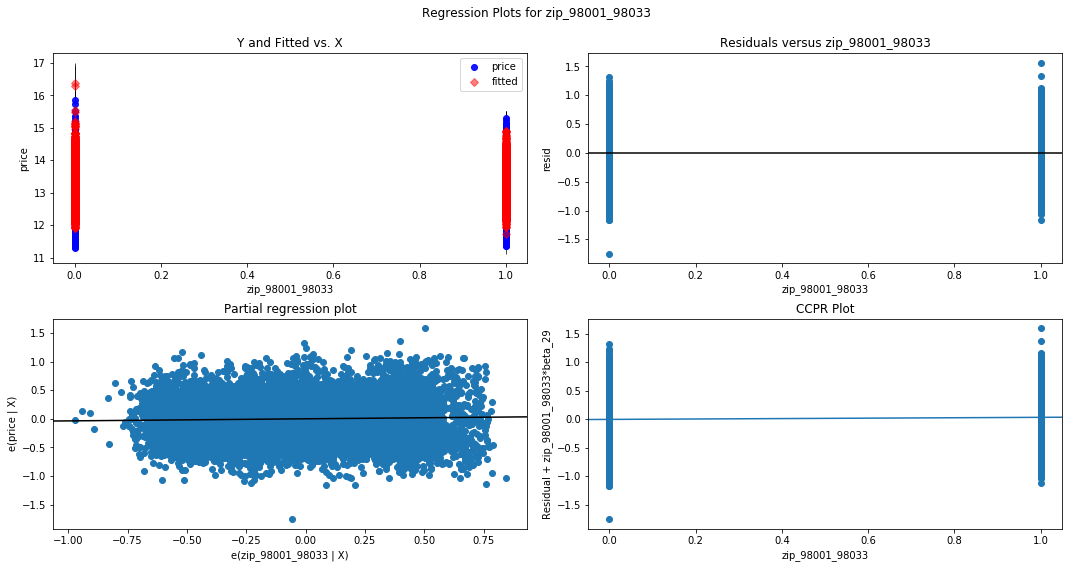

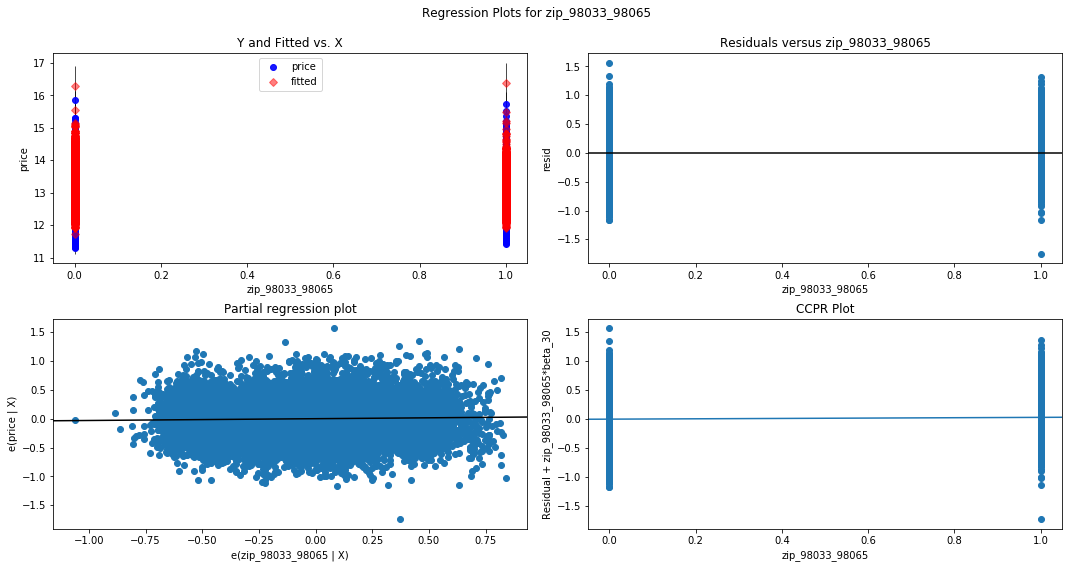

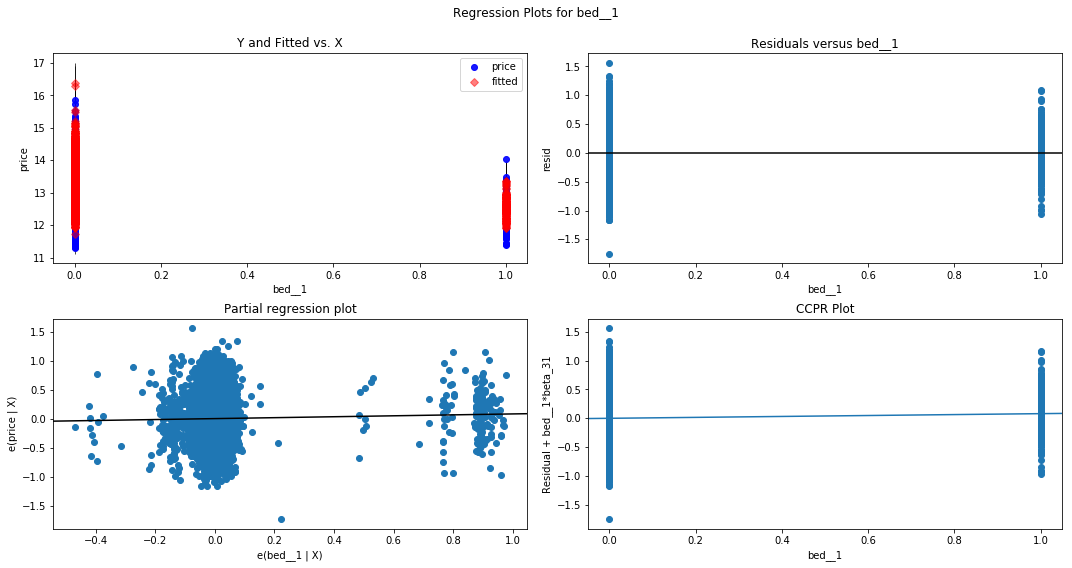

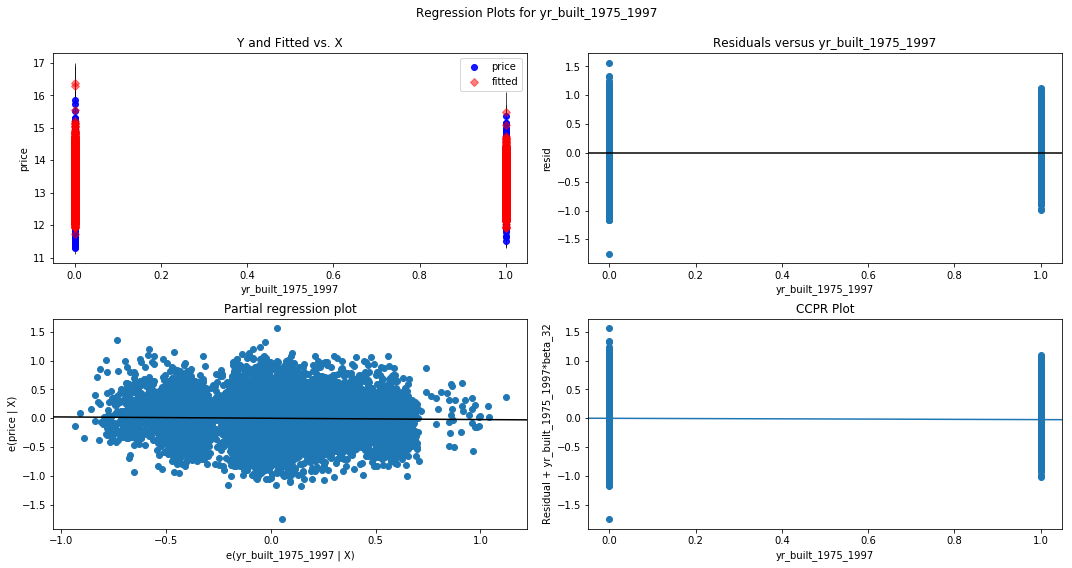

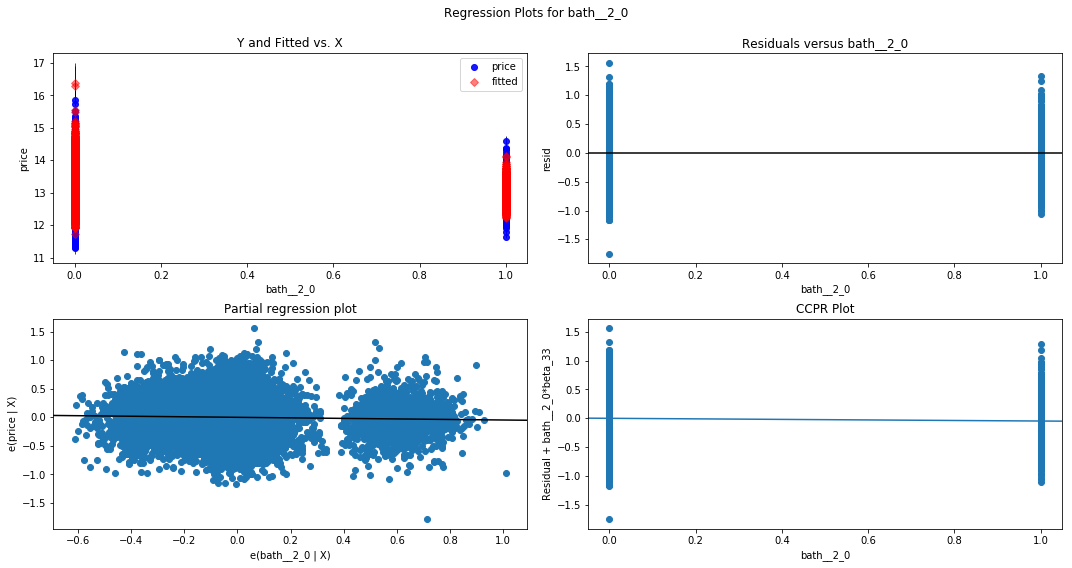

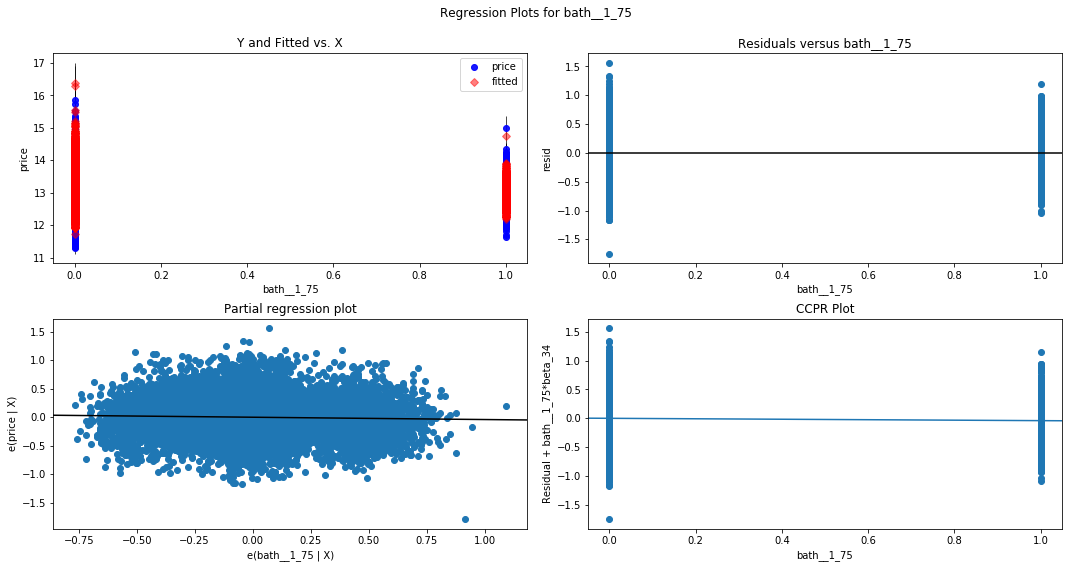

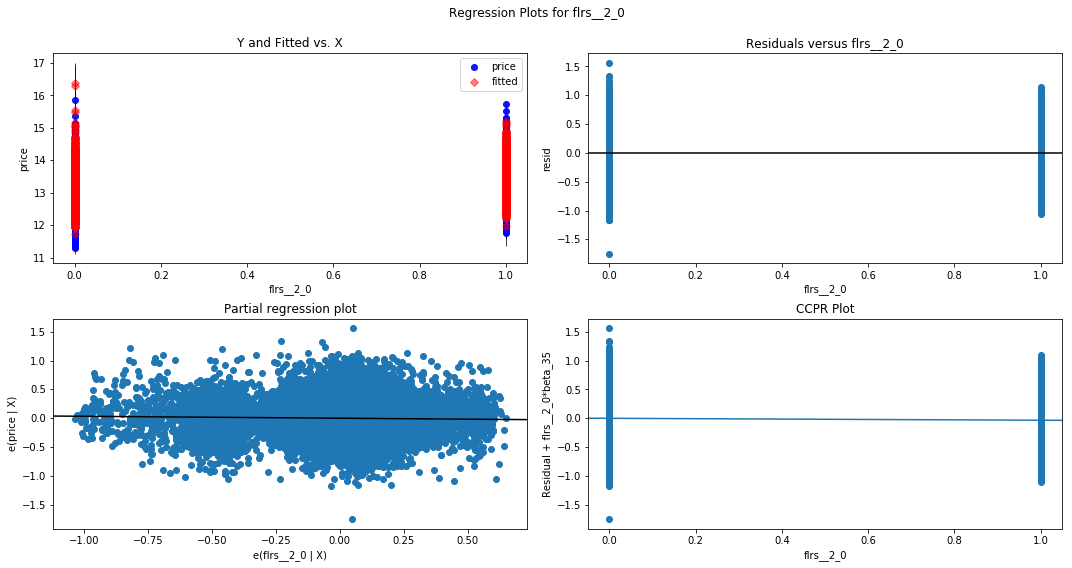

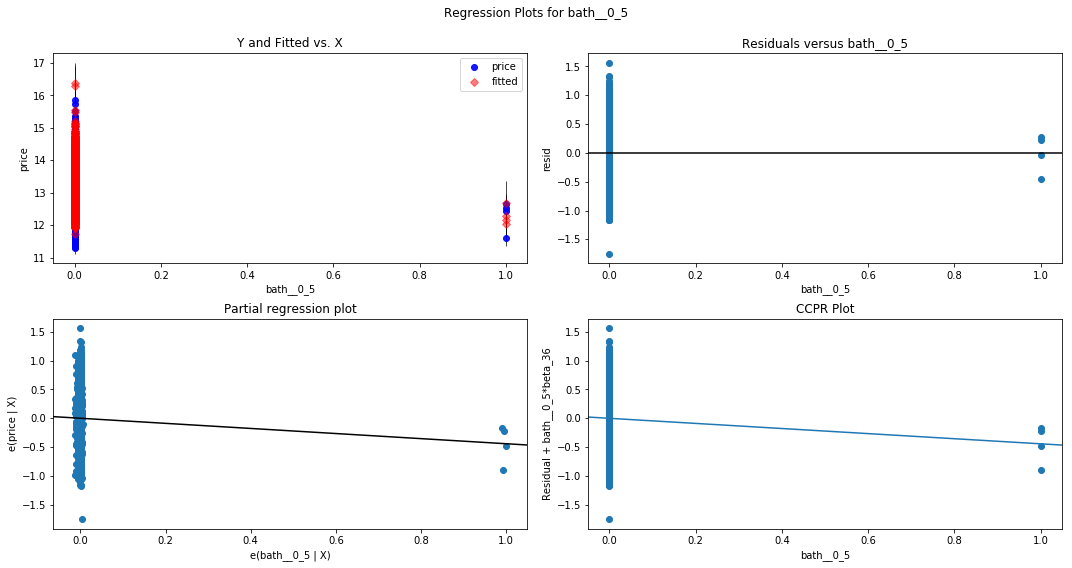

In [72]:
for column in X_train[select_features]:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, X_train[column].name, fig=fig)
    plt.show()

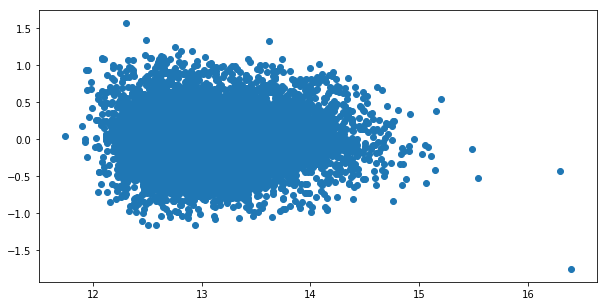

In [73]:
pred_val = model.fittedvalues.copy()
true_val = y_train.values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.scatter(pred_val, residual)

Still noticing a few major outliers that could be affecting the quality of the model, even though data points outside of three standard deviations were removed. 

### Verifying homoscedasticiy with Goldfeld-Quandt test

In [74]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

features_int = sm.add_constant(X_train[select_features])
results = sm.OLS(y_train,features_int).fit()


name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[('F statistic', 1.0190635964718617), ('p-value', 0.19059830761607702)]

## Interpretation

### Undo log-transformation on target variable

In [75]:
y_train_og = np.exp(y_train) 

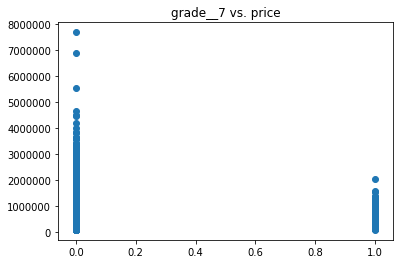

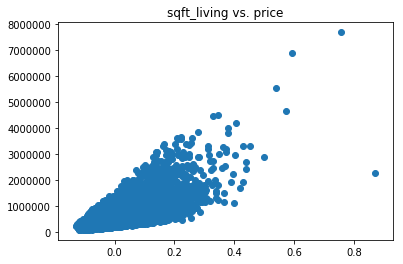

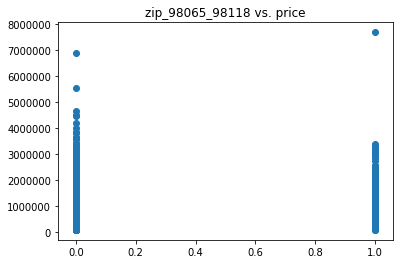

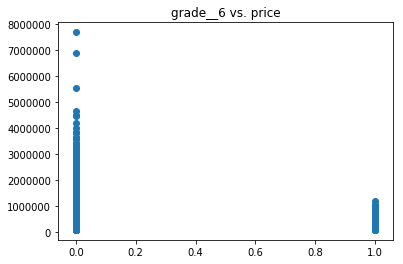

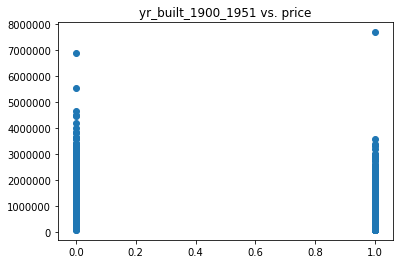

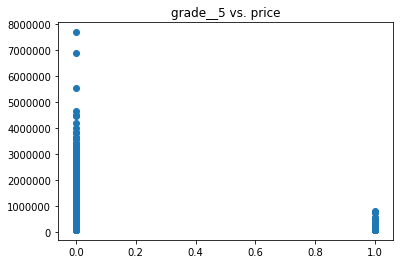

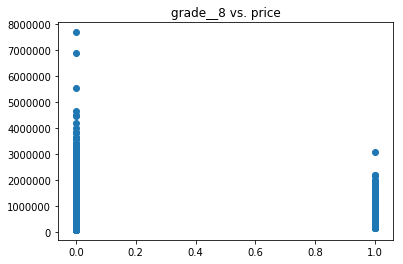

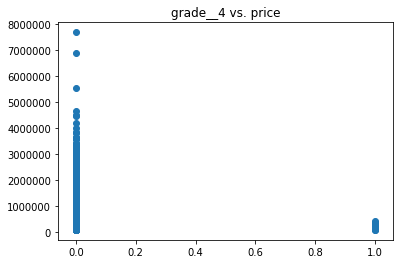

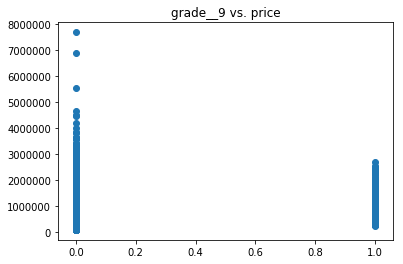

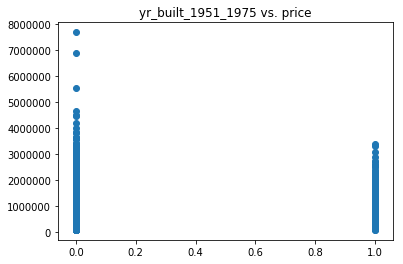

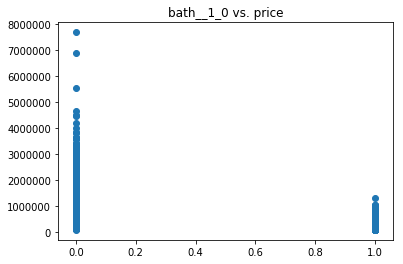

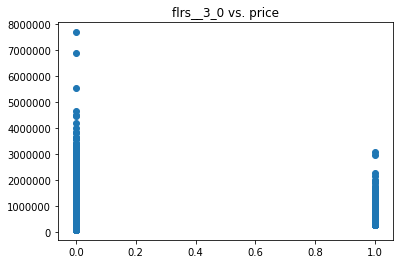

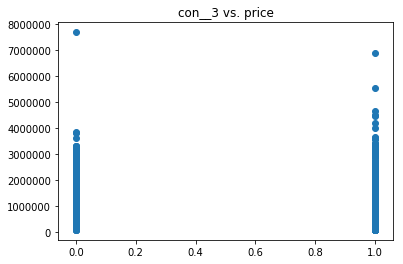

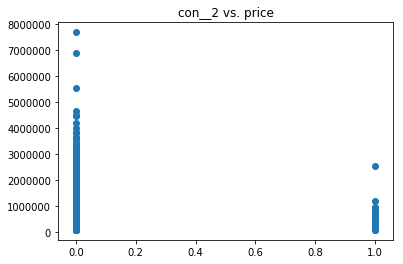

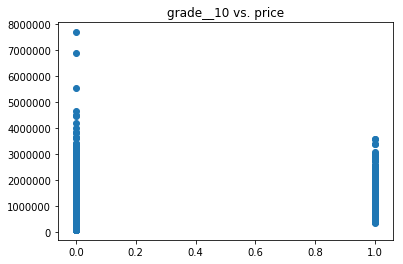

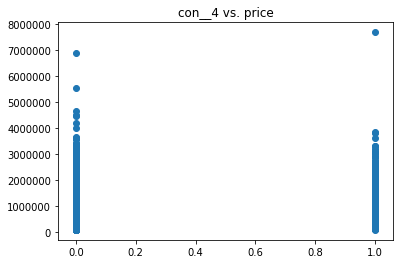

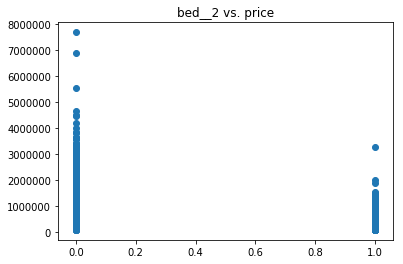

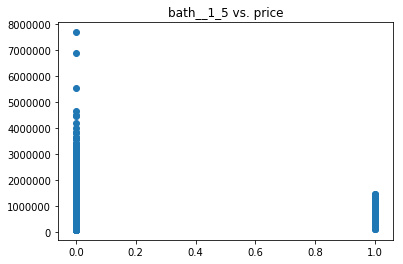

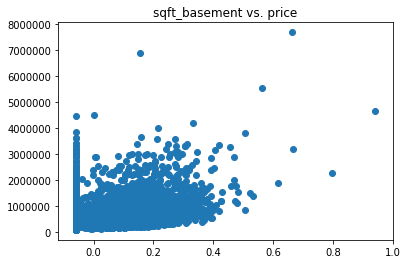

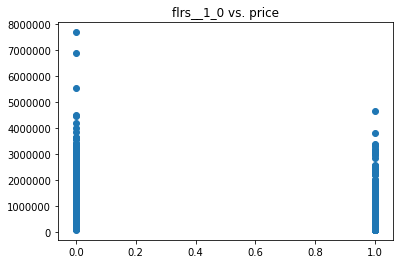

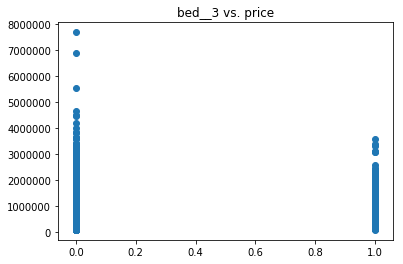

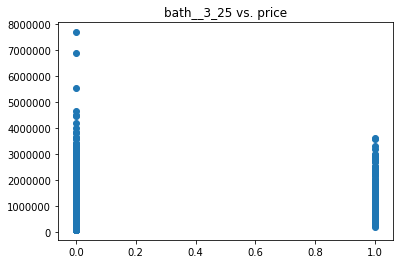

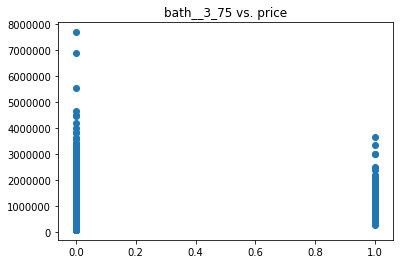

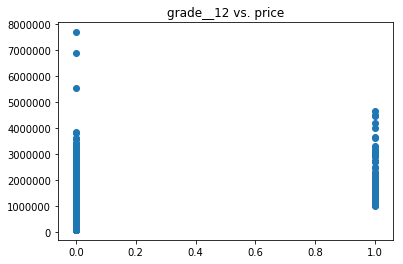

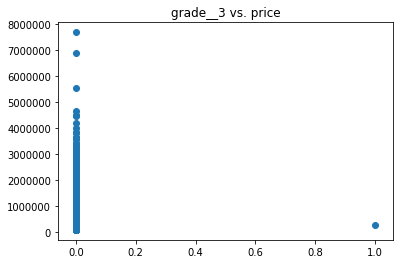

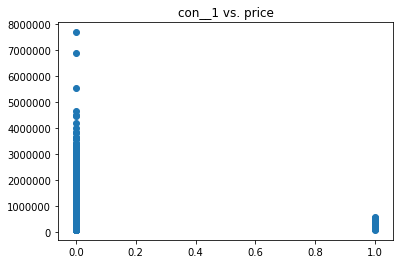

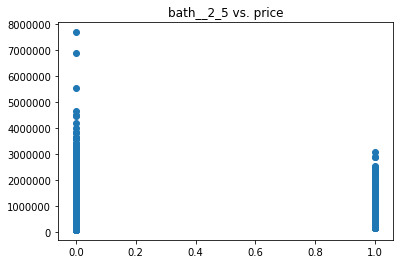

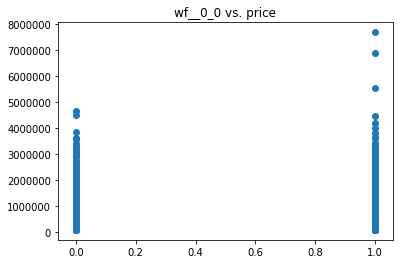

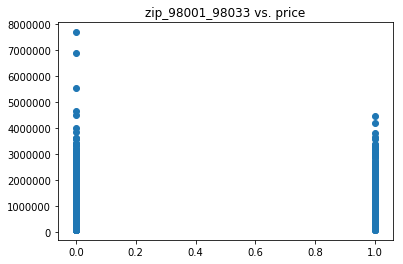

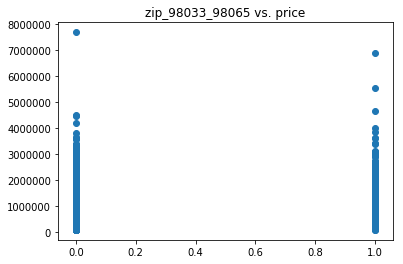

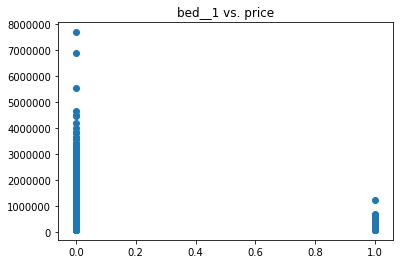

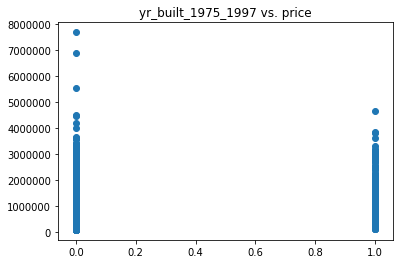

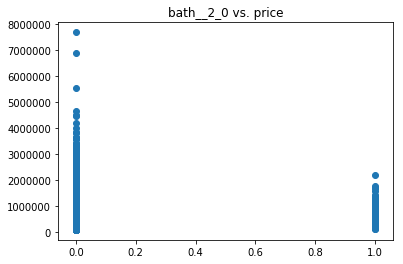

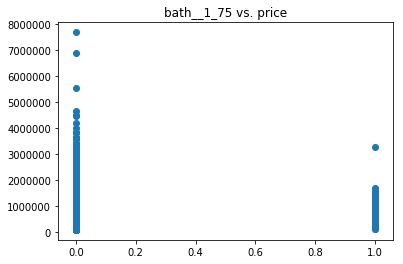

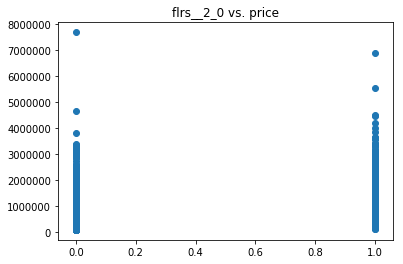

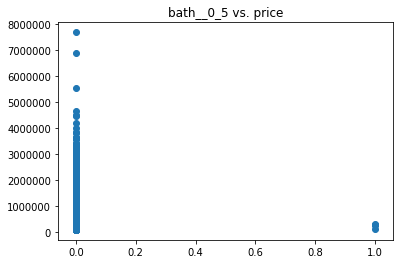

In [87]:
for column in X_train[select_features].columns:
    plt.scatter(X_train[column], y_train_og)
    plt.title(f'{column} vs. price')
    plt.show();

### Examine Coefficients

In [93]:
coefficients = dict(zip(select_features, list(model.params))) #Matching selected features to their coefficients

In [115]:
err_series = model.params - model.conf_int()[0] #Calculating confidence interval
err_series

const                 0.052915
grade__7              0.043169
sqft_living           0.146834
zip_98065_98118       0.013161
grade__6              0.047507
yr_built_1900_1951    0.019680
grade__5              0.064276
grade__8              0.041102
grade__4              0.145618
grade__9              0.039474
yr_built_1951_1975    0.018618
bath__1_0             0.021403
flrs__3_0             0.035080
con__3                0.018545
con__2                0.054590
grade__10             0.040134
con__4                0.018963
bed__2                0.018993
bath__1_5             0.022544
sqft_basement         0.070639
flrs__1_0             0.018207
bed__3                0.011659
bath__3_25            0.029647
bath__3_75            0.056744
grade__12             0.078050
grade__3              0.610089
con__1                0.125702
bath__2_5             0.013832
wf__0_0               0.014330
zip_98001_98033       0.014277
zip_98033_98065       0.014634
bed__1                0.052303
yr_built

In [116]:
coef_df = pd.DataFrame({'coef': model.params.values[1:], #Create a dataframe with relevant information
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-0.773991,0.043169,grade__7
1,2.727465,0.146834,sqft_living
2,0.141725,0.013161,zip_98065_98118
3,-1.053814,0.047507,grade__6
4,0.338848,0.019680,yr_built_1900_1951
5,-1.249860,0.064276,grade__5
6,-0.540081,0.041102,grade__8
7,-1.479260,0.145618,grade__4
8,-0.303473,0.039474,grade__9
9,0.115932,0.018618,yr_built_1951_1975


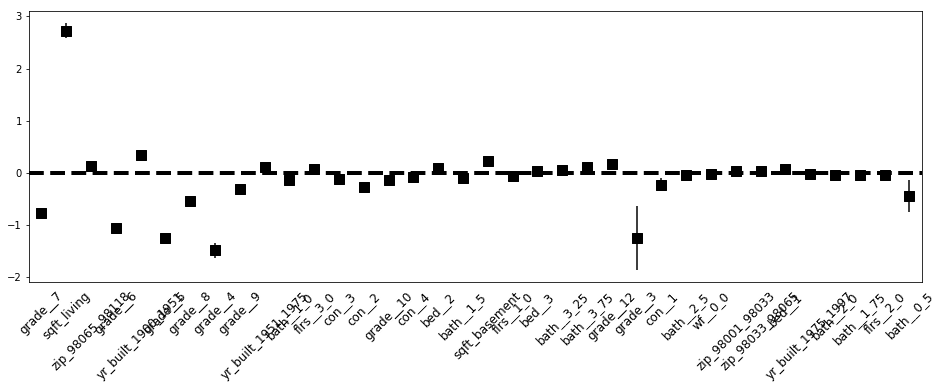

In [126]:
fig, ax = plt.subplots(figsize=(16, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(select_features, 
                       rotation=45, fontsize=12) #plotting chart to examine the distribution of positive and negative affects of each feature